<a href="https://colab.research.google.com/github/BryanVelazco03/Customer-Analytics---Ivey-Business-School/blob/main/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NATA SUPERMARKETS: CUSTOMER ANALYTICS

## Importando librerias y una visión general del conjunto de datos.

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00


In [ ]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib import style
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture


#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

### Importación de datos y descripción inicial de los datos

In [ ]:
data_inicial=pd.read_excel('W33836-XLS-ENG.xlsx', sheet_name='marketing')
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Observaciones:**

- Hay 2240 observaciones y 29 columnas en los datos.
 - Todas las columnas tienen 2240 valores no nulos, pero la variable "Income", si tiene valores perdidos.
 - Todas las columnas, excepto el "Dt_Customer", "Education","Marital_Status" y "Dt_Customer", son numéricas.
 - Todo se ve muy bien, sigamos adelante para verificar duplicados.

#### Validando registros duplicados

In [ ]:
data_inicial[data_inicial.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

### Número de observaciones y valores ausentes

In [ ]:
data_inicial.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Exploratory Data Analysis

#### Summary Statistics

In [ ]:
data_inicial.describe().T

count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2216.0                   52247.251354   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-11 22:57:38.571428608   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatalogPurchases  2240.0                       2.662054   
NumStorePurchases    2240.0                       5.790179   
NumWebVisitsMonth    2240.0                       5.316518   
AcceptedCmp3         2240.0                       0.072768   
AcceptedCmp4         2240.0                       0.074554   
AcceptedCmp5         2240.0                       0.072768   
AcceptedCmp1         2240.0                       0.064286   
AcceptedCmp2         2240.0                       0.013393   
Complain             2240.0                       0.009375   
Z_CostContact        2240.0                            3.0   
Z_Revenue            2240.0                           11.0   
Response             2240.0                       0.149107   

                                     min                  25%  \
ID                                   0.0              2828.25   
Year_Birth                        1893.0               1959.0   
Income                            1730.0              35303.0   
Kidhome                              0.0                  0.0   
Teenhome                             0.0                  0.0   
Dt_Customer          2012-01-08 00:00:00  2013-01-19 18:00:00   
Recency                              0.0                 24.0   
MntWines                             0.0                23.75   
MntFruits                            0.0                  1.0   
MntMeatProducts                      0.0                 16.0   
MntFishProducts                      0.0                  3.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         0.0                  9.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  2.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  3.0   
NumWebVisitsMonth                    0.0                  3.0   
AcceptedCmp3                         0.0                  0.0   
AcceptedCmp4                         0.0                  0.0   
AcceptedCmp5                         0.0                  0.0   
AcceptedCmp1                         0.0                  0.0   
AcceptedCmp2                         0.0                  0.0   
Complain                             0.0                  0.0   
Z_CostContact                        3.0                  3.0   
Z_Revenue                           11.0                 11.0   
Response                             0.0                  0.0   

                                     50%                  75%  \
ID                                5458.5              8427.75   
Year_Birth                        1970.0               1977.0   
Income                           51381.5              68522.0   
Kidhome                              0.0                  1.0   
Teenhome                             0.0                  1.0   
Dt_Customer          2013-07-11 00:00:00  2013-12-30 06:00:00   
Recency  

In [ ]:

columnas = data_inicial.iloc[:, 1:]

columnas.nunique()



Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**Observations:**

- La variable **Income** tiene un rango amplio de 1730 hasta 666666. Sin embargo, el promedio es de 52,247 mientras la mediana es de 51,381.5 lo cual indica que la distribución es asimétrica.
- Todas las variables son asimétricas.
-  Las columnas "Z_Revenue" y "Z_CostContact" tienen valores constantes sin variación, por lo que podemos eliminar estas dos columnas porque no proporcionan información esencial para nuestro análisis. La columna "ID" también es irrelevante para nuestro análisis porque no tenemos otros datos con los que vincular la identificación del cliente (o ID), por lo que ningún análisis en esa característica dará resultados útiles.

In [ ]:
data=data_inicial.copy()

In [ ]:
columnas_a_eliminar = ['Z_CostContact', 'Z_Revenue', 'ID']


data = data.drop(columns=columnas_a_eliminar)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [ ]:
##### Transformación de características
data['Age'] = (data['Dt_Customer'].dt.year - data['Year_Birth'])

In [ ]:
columnas_a_convertir = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response','Education','Marital_Status','Kidhome','Teenhome','Year_Birth']
# Cambiar el tipo de dato de las columnas a categórico
data[columnas_a_convertir] = data[columnas_a_convertir].astype('category')


#### Distribución y datos atípicos

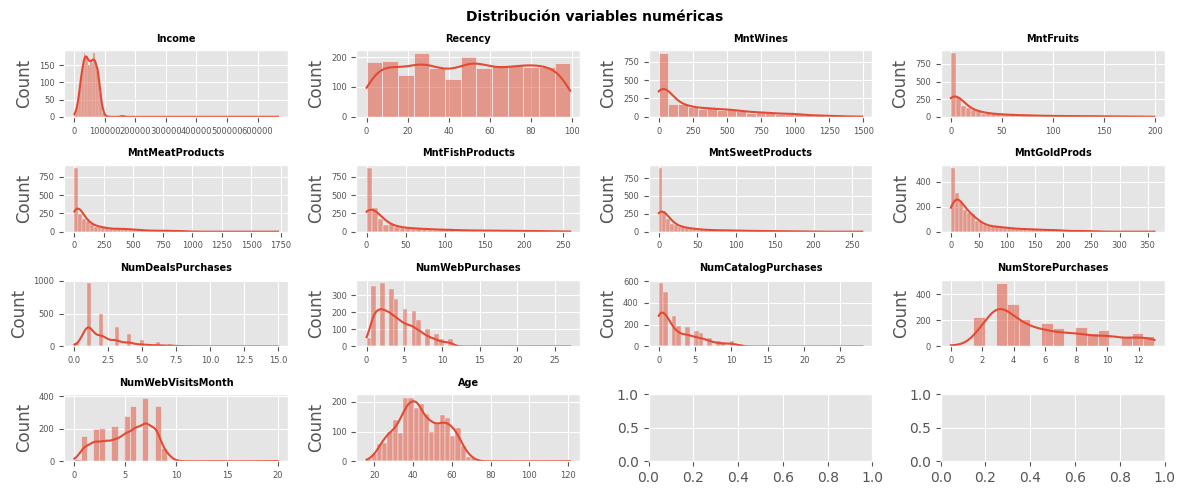

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(data=data, x=colum, kde=True, ax=axes[i])
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")
plt.show()


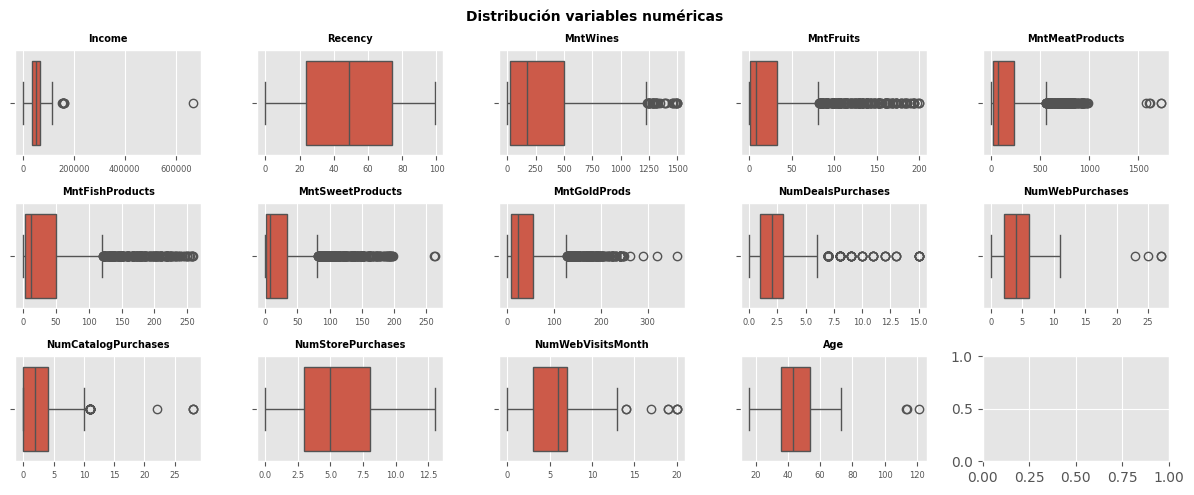

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el número de subplots en función del número de columnas numéricas
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(data=data, x=colum, ax=axes[i])
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")
plt.show()


In [ ]:
# Obtener las columnas numéricas excluyendo 'category', 'datetime' y 'Year_Birth'
numeric_columns = data.select_dtypes(exclude=['category', 'datetime64', 'object']).columns

outliers_indexes = []
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = data[(data[col] < minimum) | (data[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))


706 outliers were identified, whose indices are:

[0, 2048, 2049, 2056, 2057, 2058, 2059, 12, 9, 2062, 17, 2065, 2067, 18, 21, 2071, 24, 2073, 2074, 27, 29, 2081, 2083, 2084, 2086, 39, 40, 2090, 45, 2093, 2096, 49, 2098, 51, 53, 54, 55, 56, 2109, 62, 64, 67, 68, 69, 70, 2118, 72, 2123, 76, 77, 2127, 2131, 2132, 2134, 88, 90, 2144, 98, 102, 2151, 104, 107, 109, 110, 111, 2160, 2163, 116, 117, 2166, 2167, 2168, 2171, 2172, 124, 126, 2175, 2176, 125, 130, 2173, 132, 2178, 135, 2185, 2186, 2187, 140, 2188, 142, 2190, 2193, 2194, 148, 2198, 2203, 2206, 159, 161, 2211, 164, 2213, 166, 168, 2217, 176, 2226, 179, 2228, 182, 2233, 2235, 188, 2236, 191, 192, 197, 198, 201, 202, 203, 209, 211, 212, 213, 214, 226, 228, 230, 231, 239, 240, 241, 243, 244, 247, 248, 249, 252, 266, 268, 270, 276, 277, 278, 279, 281, 282, 286, 287, 288, 292, 295, 305, 312, 313, 335, 336, 338, 339, 340, 345, 347, 351, 353, 357, 360, 364, 365, 366, 368, 378, 383, 387, 390, 392, 401, 404, 411, 415, 418, 419, 423, 424, 426

In [ ]:
removing_indexes = outliers_indexes  # Si no tienes otra lista de índices para eliminar, usa esta línea
print('Indices to be removed:\n\n{}'.format(removing_indexes))

Indices to be removed:

[0, 2048, 2049, 2056, 2057, 2058, 2059, 12, 9, 2062, 17, 2065, 2067, 18, 21, 2071, 24, 2073, 2074, 27, 29, 2081, 2083, 2084, 2086, 39, 40, 2090, 45, 2093, 2096, 49, 2098, 51, 53, 54, 55, 56, 2109, 62, 64, 67, 68, 69, 70, 2118, 72, 2123, 76, 77, 2127, 2131, 2132, 2134, 88, 90, 2144, 98, 102, 2151, 104, 107, 109, 110, 111, 2160, 2163, 116, 117, 2166, 2167, 2168, 2171, 2172, 124, 126, 2175, 2176, 125, 130, 2173, 132, 2178, 135, 2185, 2186, 2187, 140, 2188, 142, 2190, 2193, 2194, 148, 2198, 2203, 2206, 159, 161, 2211, 164, 2213, 166, 168, 2217, 176, 2226, 179, 2228, 182, 2233, 2235, 188, 2236, 191, 192, 197, 198, 201, 202, 203, 209, 211, 212, 213, 214, 226, 228, 230, 231, 239, 240, 241, 243, 244, 247, 248, 249, 252, 266, 268, 270, 276, 277, 278, 279, 281, 282, 286, 287, 288, 292, 295, 305, 312, 313, 335, 336, 338, 339, 340, 345, 347, 351, 353, 357, 360, 364, 365, 366, 368, 378, 383, 387, 390, 392, 401, 404, 411, 415, 418, 419, 423, 424, 426, 429, 430, 431, 432, 447,

In [ ]:
df1 = data.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           1534 non-null   category      
 1   Education            1534 non-null   category      
 2   Marital_Status       1534 non-null   category      
 3   Income               1517 non-null   float64       
 4   Kidhome              1534 non-null   category      
 5   Teenhome             1534 non-null   category      
 6   Dt_Customer          1534 non-null   datetime64[ns]
 7   Recency              1534 non-null   int64         
 8   MntWines             1534 non-null   int64         
 9   MntFruits            1534 non-null   int64         
 10  MntMeatProducts      1534 non-null   int64         
 11  MntFishProducts      1534 non-null   int64         
 12  MntSweetProducts     1534 non-null   int64         
 13  MntGoldProds         1534 non-nul

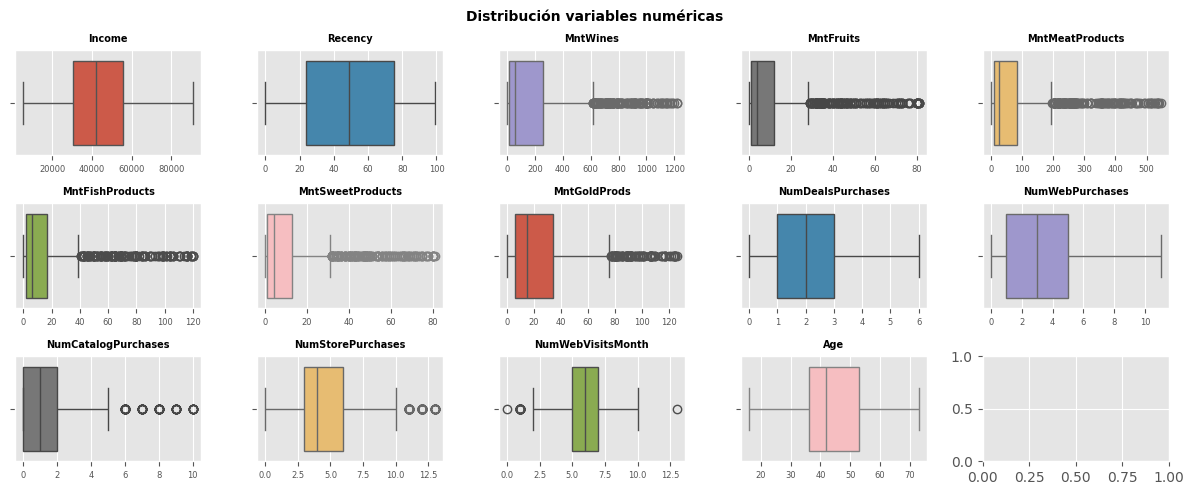

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 5))
axes = axes.flat
columnas_numeric = df1.select_dtypes(include=['float64', 'int64']).columns


for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = df1,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

#### Análisis univariante de variables categóricas

In [ ]:
CatCols = df1.select_dtypes(include='category').columns
CatCols

Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

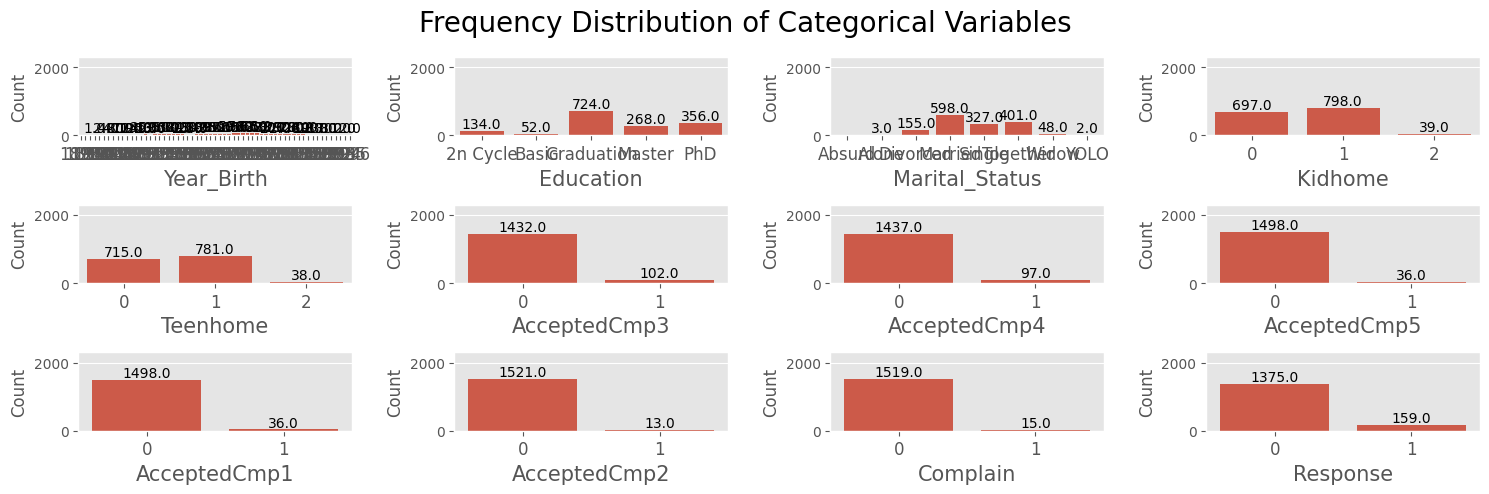

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
    graph = sns.countplot(x=CatCols[i], data=df1, ax=ax[i // 4, i % 4])  # Asegúrate de calcular correctamente los índices para subplots
    ax[i // 4, i % 4].set_xlabel(CatCols[i], fontsize=15)
    ax[i // 4, i % 4].set_ylabel('Count', fontsize=12)
    ax[i // 4, i % 4].set_ylim([0, 2300])
    ax[i // 4, i % 4].tick_params(axis='x', labelsize=12)  # Ajusta el tamaño de las etiquetas del eje x

    # Agregar etiquetas a las barras
    for p in graph.patches:
        height = p.get_height()
        ax[i // 4, i % 4].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                   textcoords='offset points')

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()


#### Análisis univariante de variables numéricas

In [ ]:
NumCols = df1.select_dtypes(include=['float64', 'int64']).columns

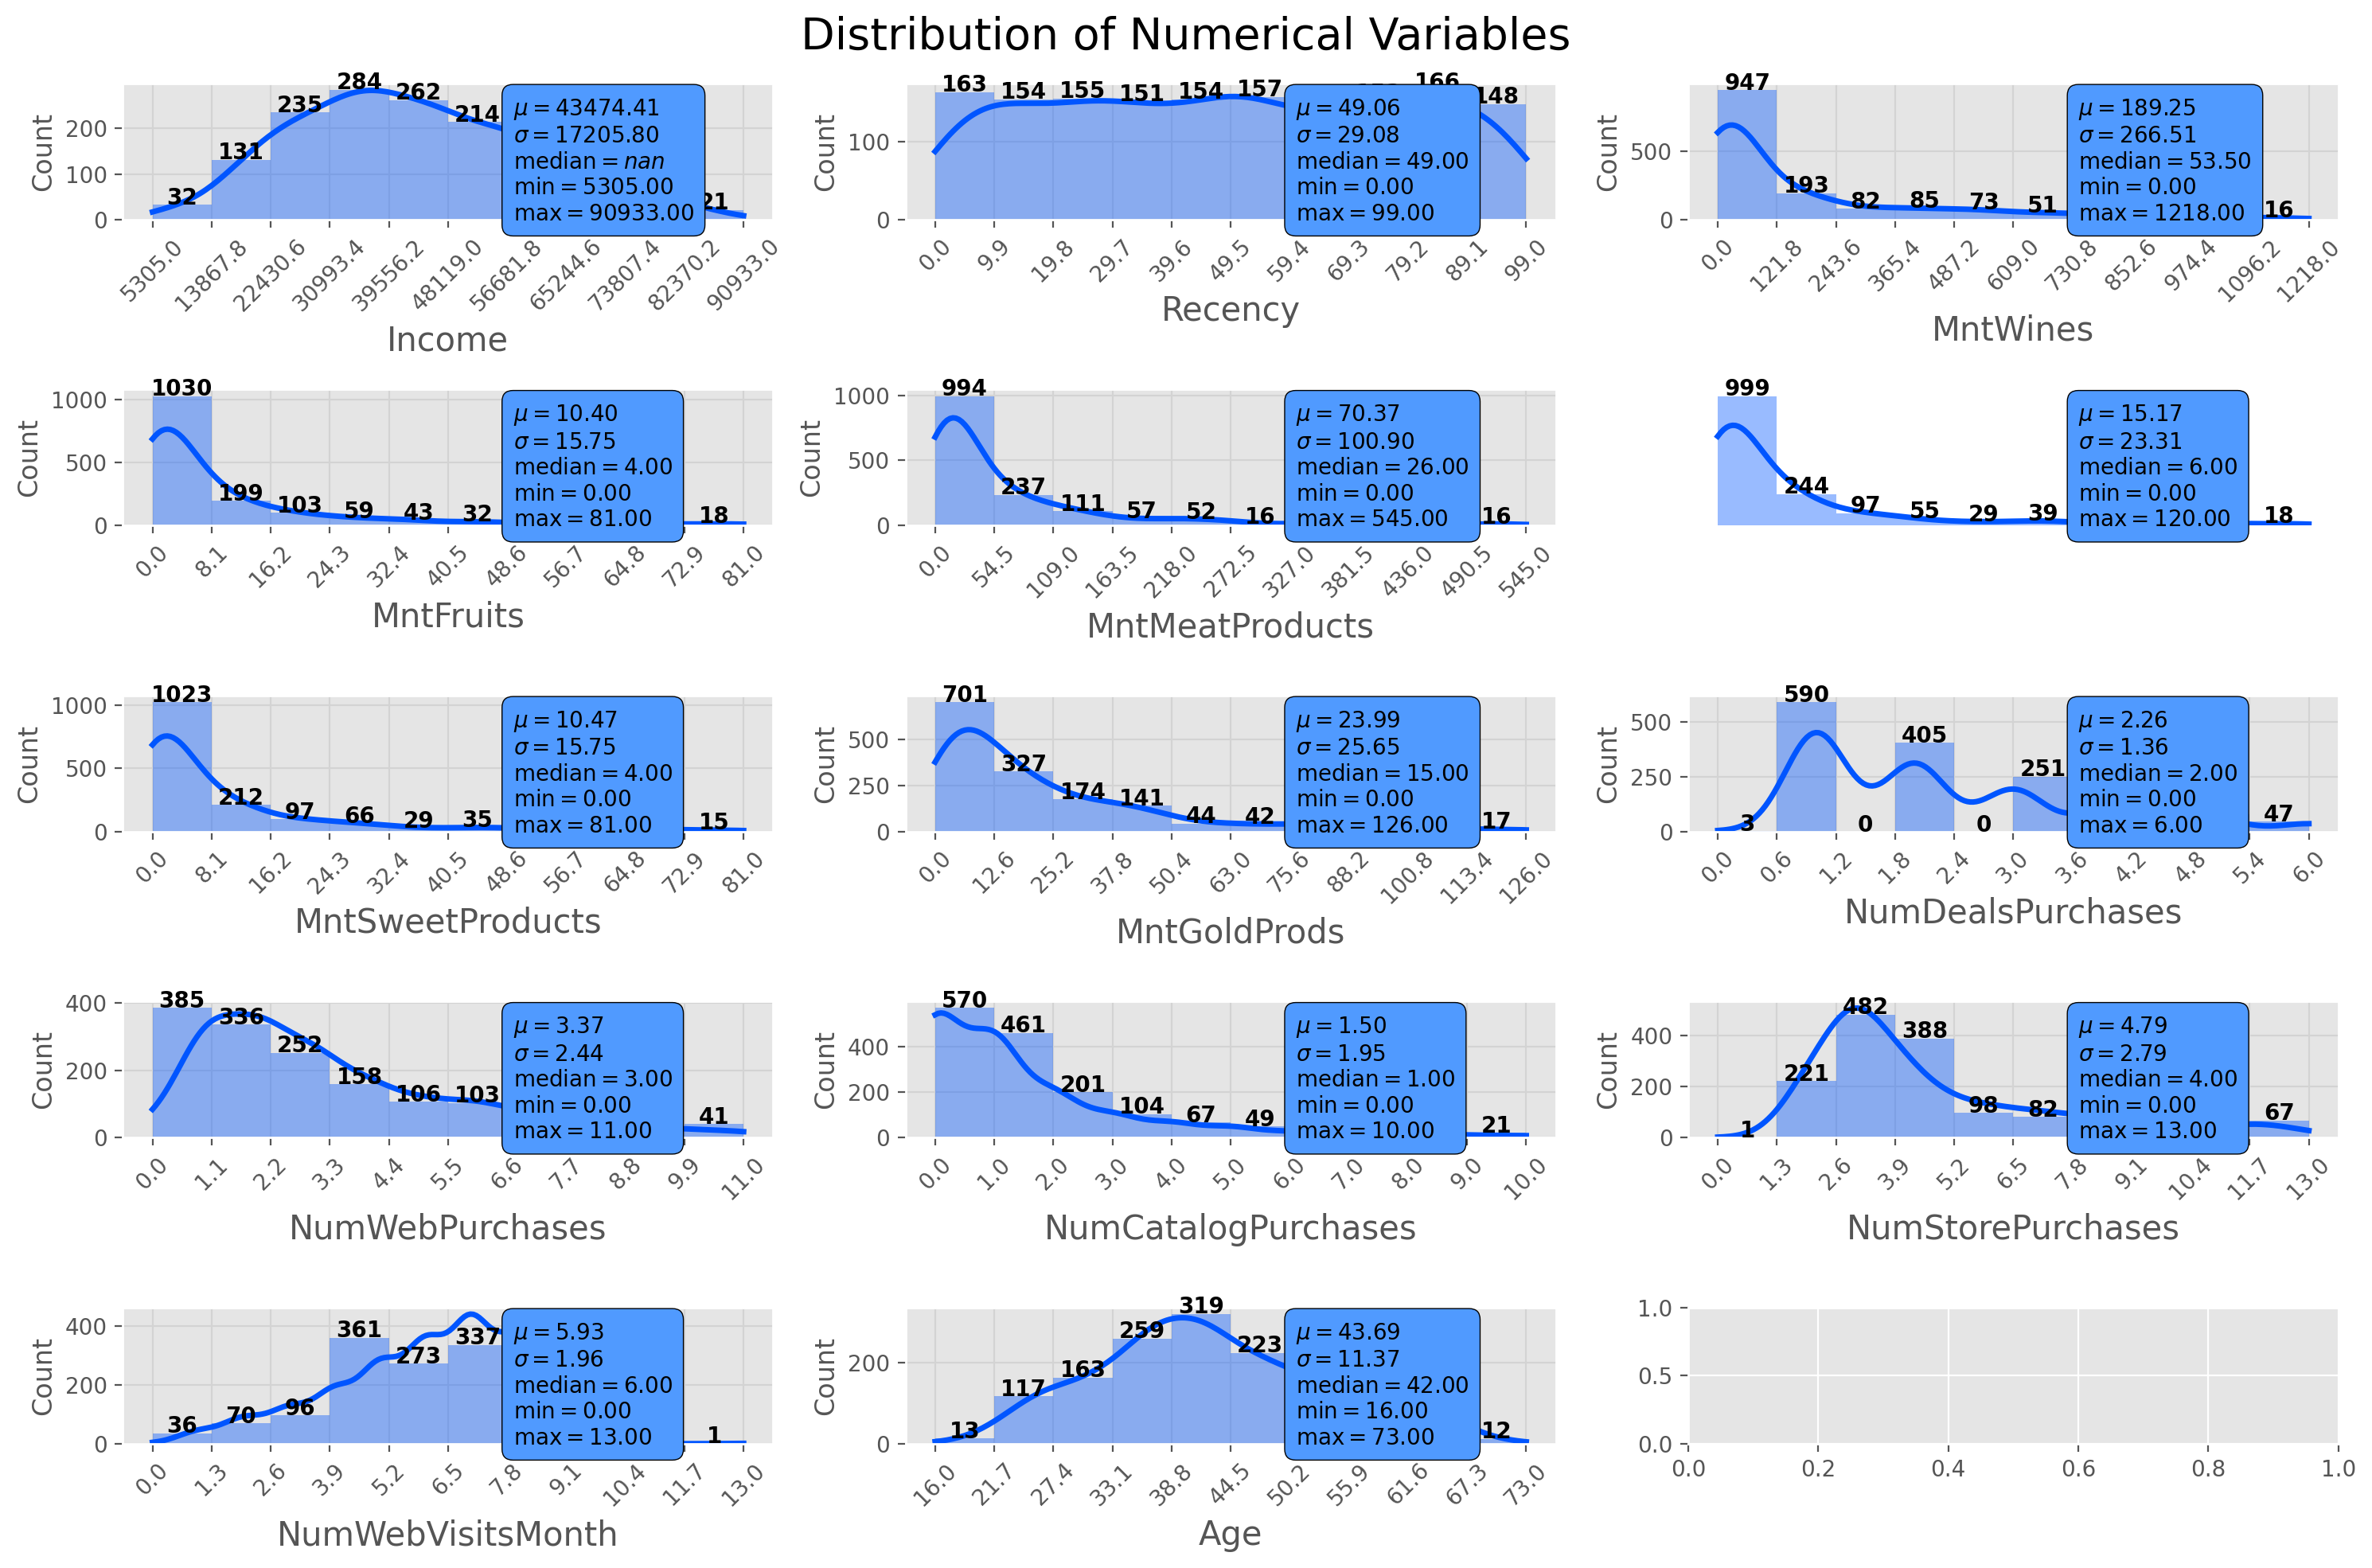

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]],
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df1.select_dtypes(include=['int64','float64']))
df1[df1.select_dtypes(include=['int64','float64']).columns]=imputer.transform(df1.select_dtypes(include=['int64','float64']))


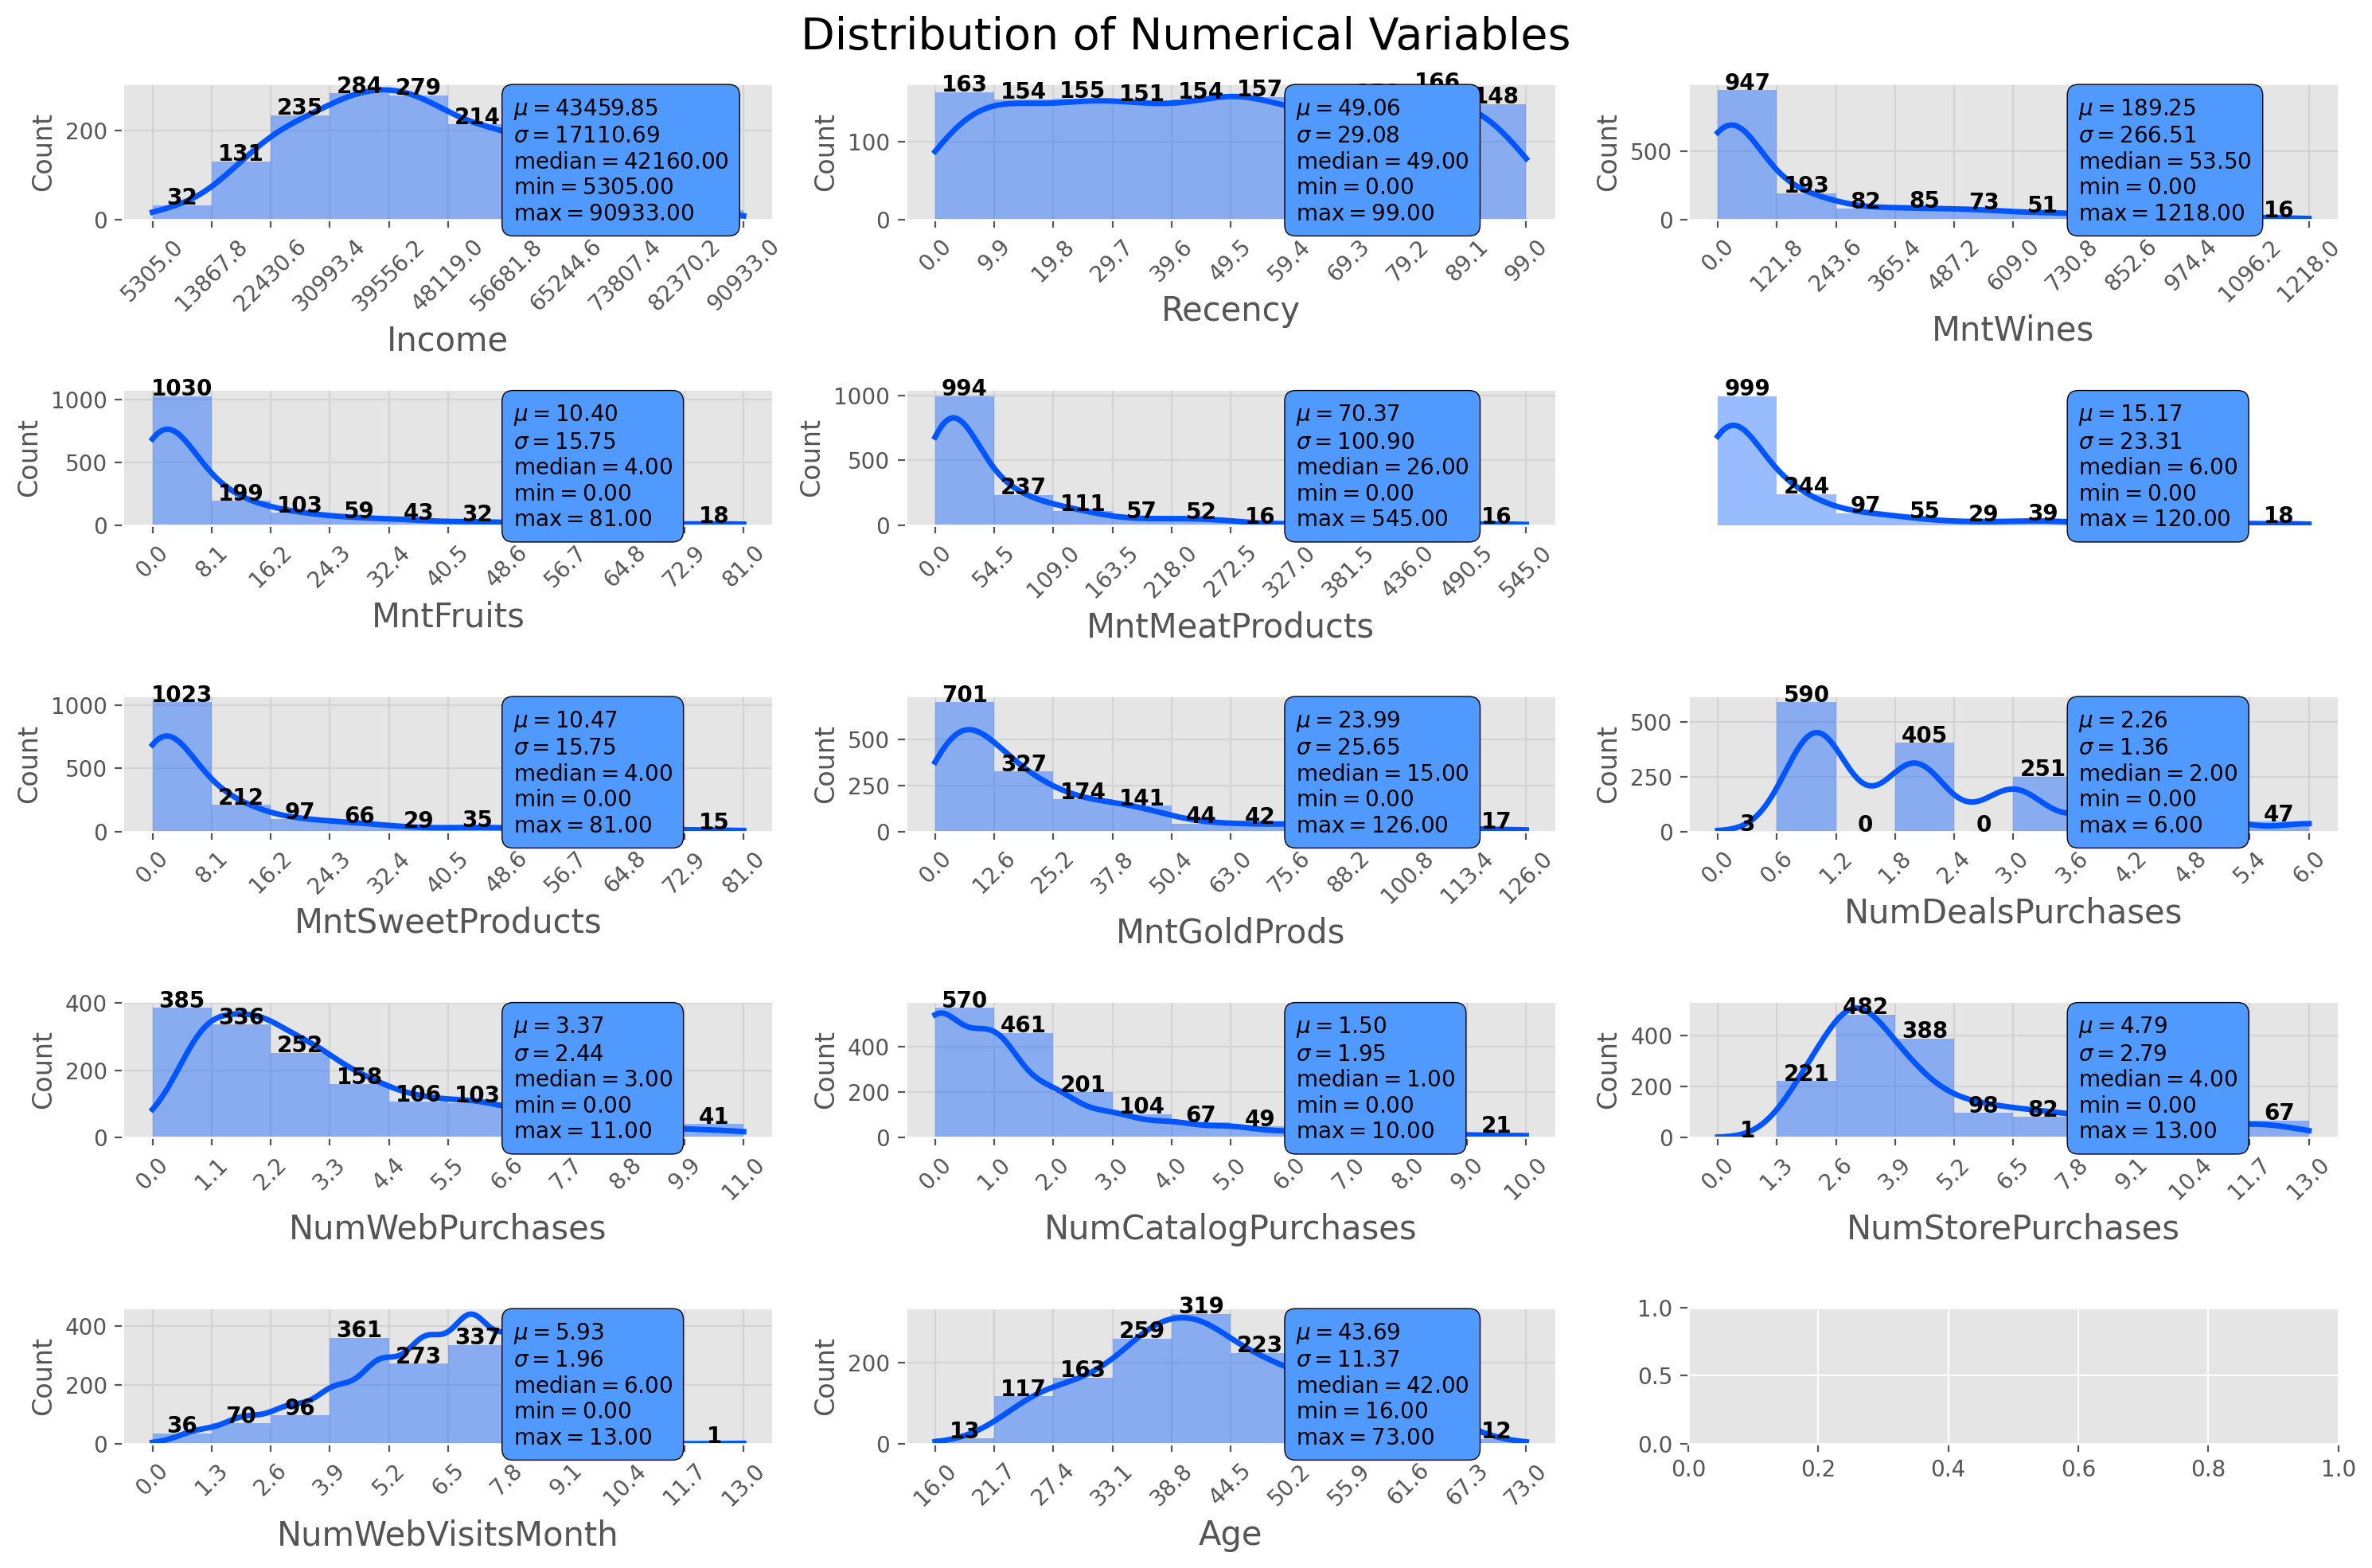

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[NumCols[i]],
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(NumCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[NumCols[i]].mean(),
    r'$\sigma=%.2f$' %df1[NumCols[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[NumCols[i]]),
    r'$\mathrm{min}=%.2f$' %df1[NumCols[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[NumCols[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df1.describe(percentiles=[.01, .05, .25, .50, .75, .99]).T

count                           mean  \
Income               1534.0                   43459.846806   
Dt_Customer            1534  2013-07-28 21:58:54.289439488   
Recency              1534.0                      49.059974   
MntWines             1534.0                     189.250978   
MntFruits            1534.0                       10.40352   
MntMeatProducts      1534.0                      70.374185   
MntFishProducts      1534.0                      15.173403   
MntSweetProducts     1534.0                      10.472621   
MntGoldProds         1534.0                      23.991525   
NumDealsPurchases    1534.0                       2.260104   
NumWebPurchases      1534.0                       3.369622   
NumCatalogPurchases  1534.0                       1.502608   
NumStorePurchases    1534.0                       4.793351   
NumWebVisitsMonth    1534.0                       5.925684   
Age                  1534.0                      43.687744   

                                     min                   1%  \
Income                            5305.0              9351.69   
Dt_Customer          2012-01-08 00:00:00  2012-03-09 00:00:00   
Recency                              0.0                  0.0   
MntWines                             0.0                  1.0   
MntFruits                            0.0                  0.0   
MntMeatProducts                      0.0                  2.0   
MntFishProducts                      0.0                  0.0   
MntSweetProducts                     0.0                  0.0   
MntGoldProds                         0.0                  0.0   
NumDealsPurchases                    0.0                  1.0   
NumWebPurchases                      0.0                  0.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    0.0                  2.0   
NumWebVisitsMonth                    0.0                  1.0   
Age                                 16.0                 22.0   

                                      5%                  25%  \
Income                           17592.3             30630.25   
Dt_Customer          2012-08-08 15:36:00  2013-02-10 00:00:00   
Recency                              4.0                 24.0   
MntWines                             2.0                 13.0   
MntFruits                            0.0                  1.0   
MntMeatProducts                     3.65                 11.0   
MntFishProducts                      0.0                  2.0   
MntSweetProducts                     0.0                  1.0   
MntGoldProds                         1.0                  6.0   
NumDealsPurchases                    1.0                  1.0   
NumWebPurchases                      1.0                  1.0   
NumCatalogPurchases                  0.0                  0.0   
NumStorePurchases                    2.0                  3.0   
NumWebVisitsMonth                    2.0                  5.0   
Age                                 26.0                 36.0   

                                     50%                  75%  \
Income                           42160.0              55585.5   
Dt_Customer          2013-07-31 00:00:00  2014-01-25 00:00:00   
Recency                             49.0                 75.0   
MntWines                            53.5                254.0   
MntFruits                            4.0                 12.0   
MntMeatProducts                     26.0                84.75   
MntFishProducts                      6.0                 17.0   
MntSweetProducts                     4.0                 13.0   
MntGoldProds                        15.0                 34.0   
NumDealsPurchases                    2.0                  3.0   
NumWebPurchases                      3.0                  5.0   
NumCatalogPurchases                  1.0                  2.0   
NumStorePurchases                    4.0                  6.0   
NumWebVisitsMonth                    

In [ ]:
columnas_a_eliminar = ['Year_Birth']


df1 = df1.drop(columns=columnas_a_eliminar)

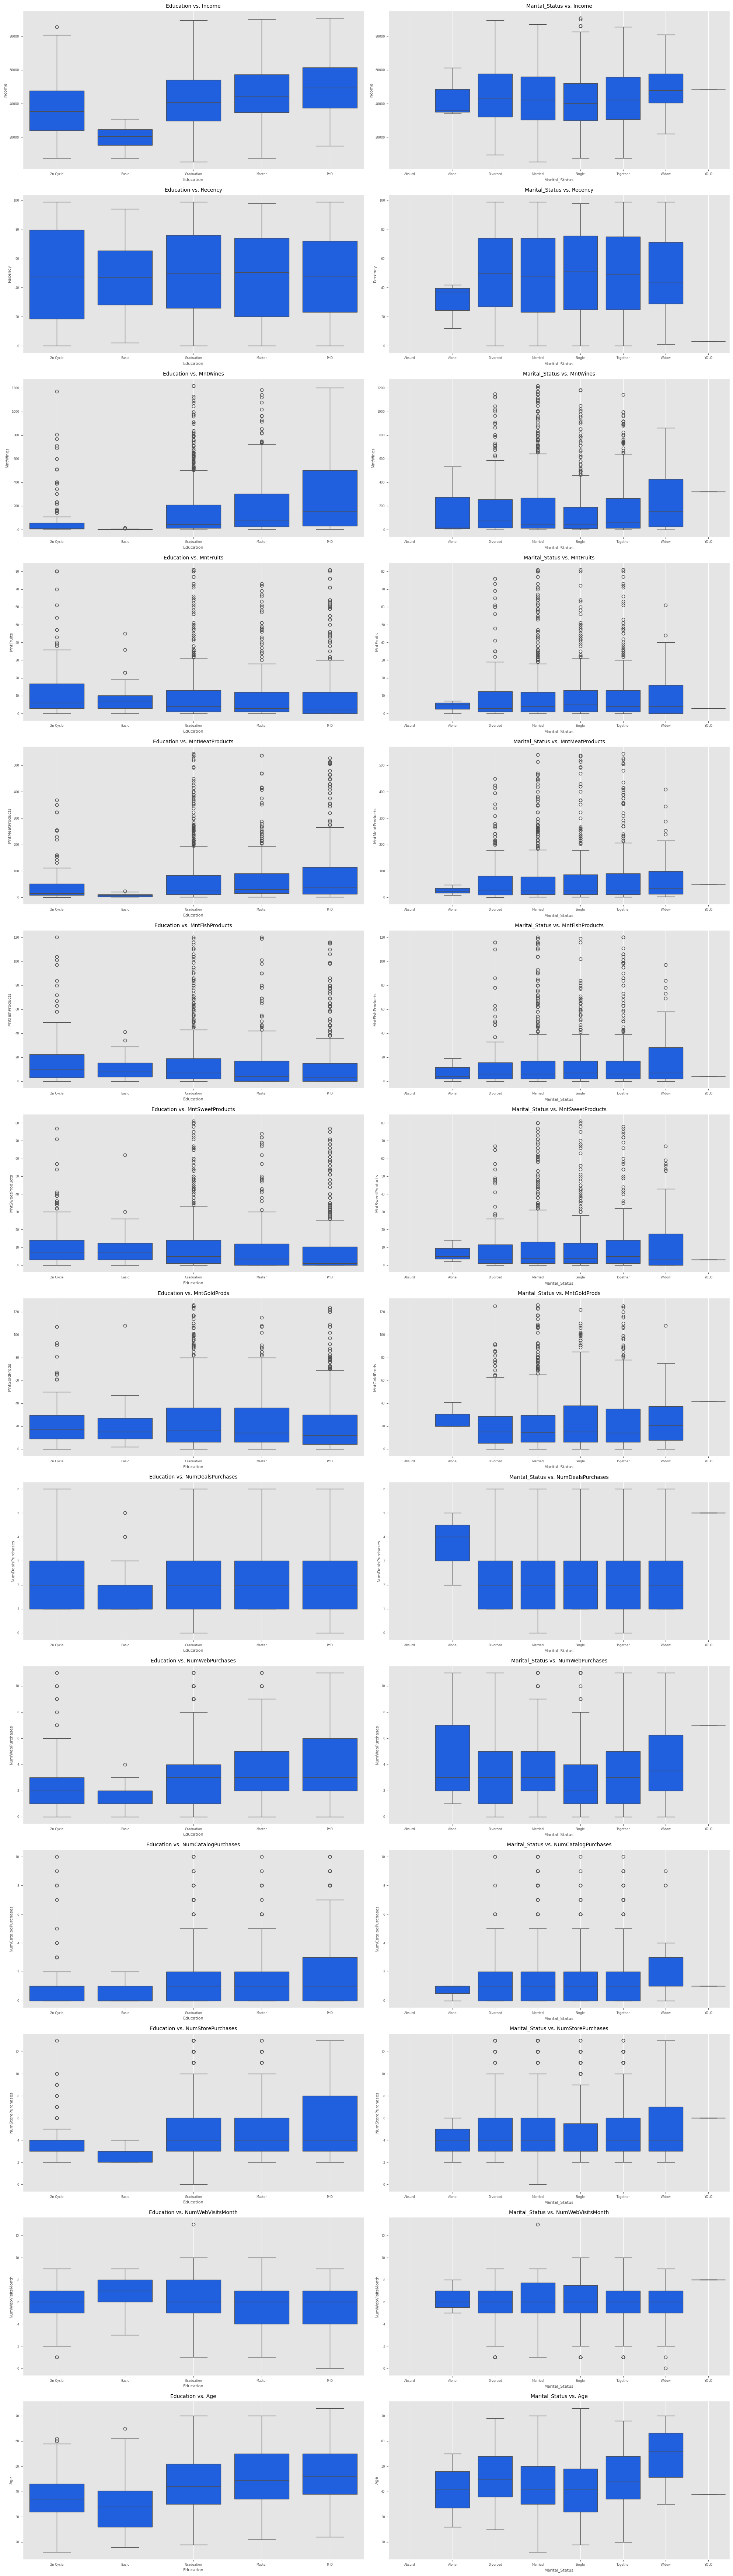

In [ ]:
# Separar columnas categóricas y numéricas
cat_features = df1.select_dtypes(include='category').columns
num_features = df1.select_dtypes(include=['int64', 'float64']).columns

# Ajustar el tamaño del gráfico y la disposición de los subplots
fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(20, 5*len(num_features)), dpi=100)

# Colores para los puntos del gráfico
c = '#0055ff'

# Crear gráficos bivariados de tipo boxplot
for i, num_col in enumerate(num_features):
    for j, cat_col in enumerate(cat_features[:2]):  # Reducir la cantidad de columnas categóricas para evitar el error de índice
        sns.boxplot(ax=axes[i, j], x=cat_col, y=num_col, data=df1, color=c)
        axes[i, j].set_title('{} vs. {}'.format(cat_col, num_col), size=10)
        axes[i, j].set_xlabel(cat_col, size=8)
        axes[i, j].set_ylabel(num_col, size=8)
        axes[i, j].tick_params(labelsize=6)
        axes[i, j].grid()

plt.tight_layout()
plt.show()


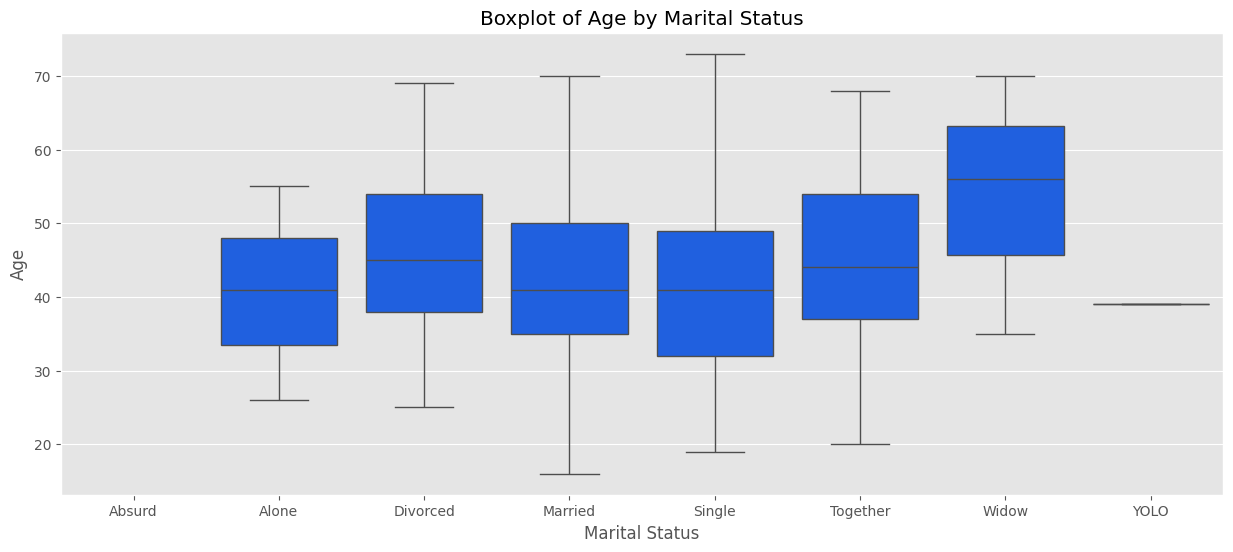

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Marital_Status'], y=df1['Age'], data=df1, color=c)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Age')
ax.set_title('Boxplot of Age by Marital Status')
plt.show()


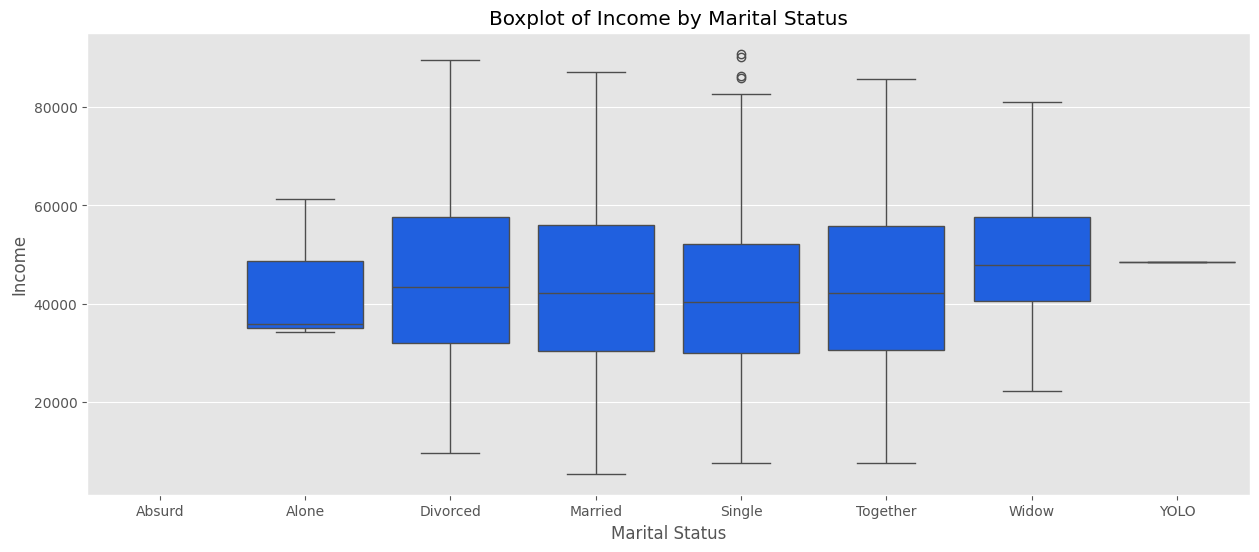

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Marital_Status'], y=df1['Income'], data=df1, color=c)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Income')
ax.set_title('Boxplot of Income by Marital Status')
plt.show()

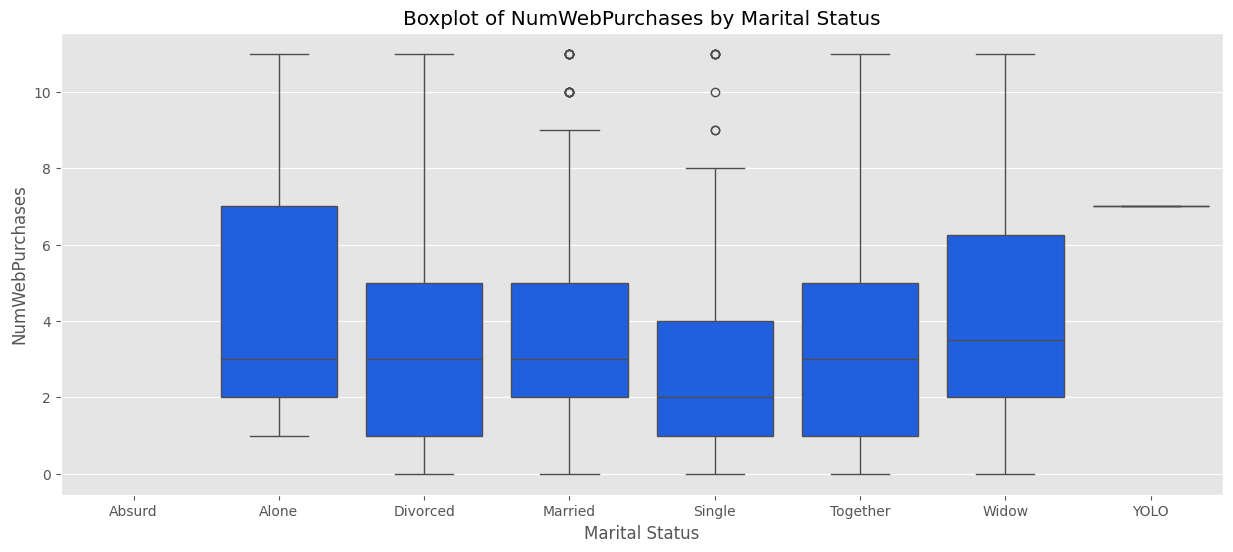

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Marital_Status'], y=df1['NumWebPurchases'], data=df1, color=c)
ax.set_xlabel('Marital Status')
ax.set_ylabel('NumWebPurchases')
ax.set_title('Boxplot of NumWebPurchases by Marital Status')
plt.show()

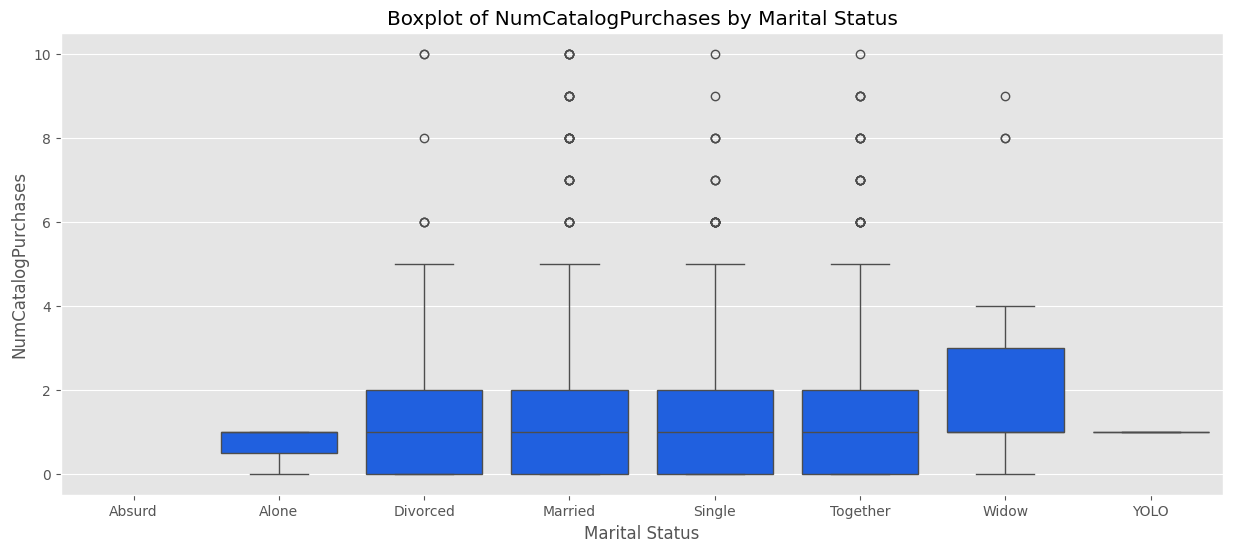

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Marital_Status'], y=df1['NumCatalogPurchases'], data=df1, color=c)
ax.set_xlabel('Marital Status')
ax.set_ylabel('NumCatalogPurchases')
ax.set_title('Boxplot of NumCatalogPurchases by Marital Status')
plt.show()

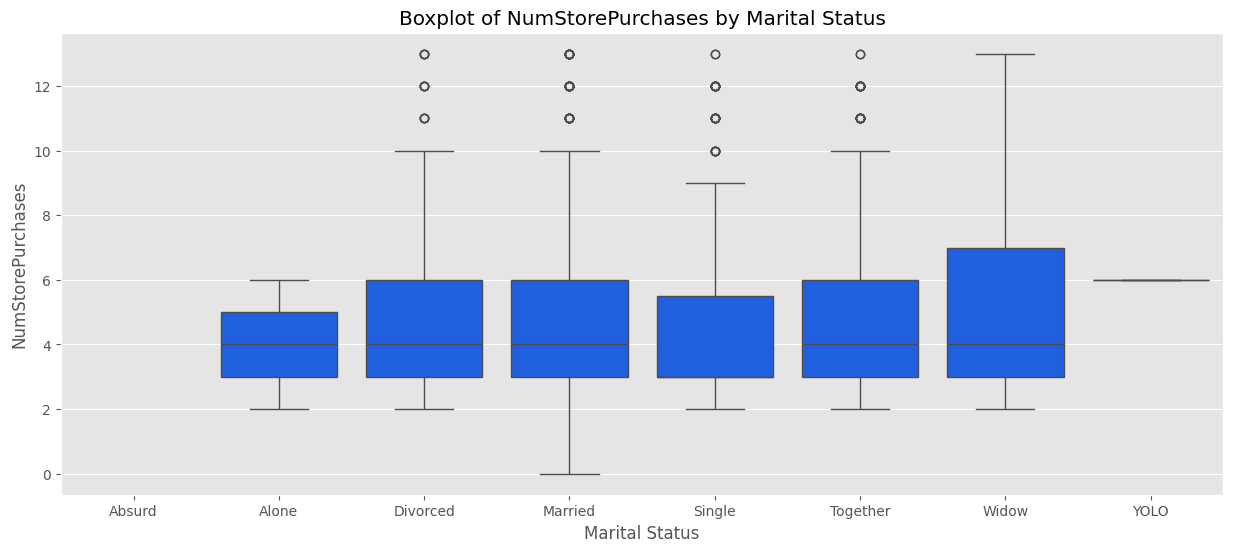

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Marital_Status'], y=df1['NumStorePurchases'], data=df1, color=c)
ax.set_xlabel('Marital Status')
ax.set_ylabel('NumStorePurchases')
ax.set_title('Boxplot of NumStorePurchases by Marital Status')
plt.show()

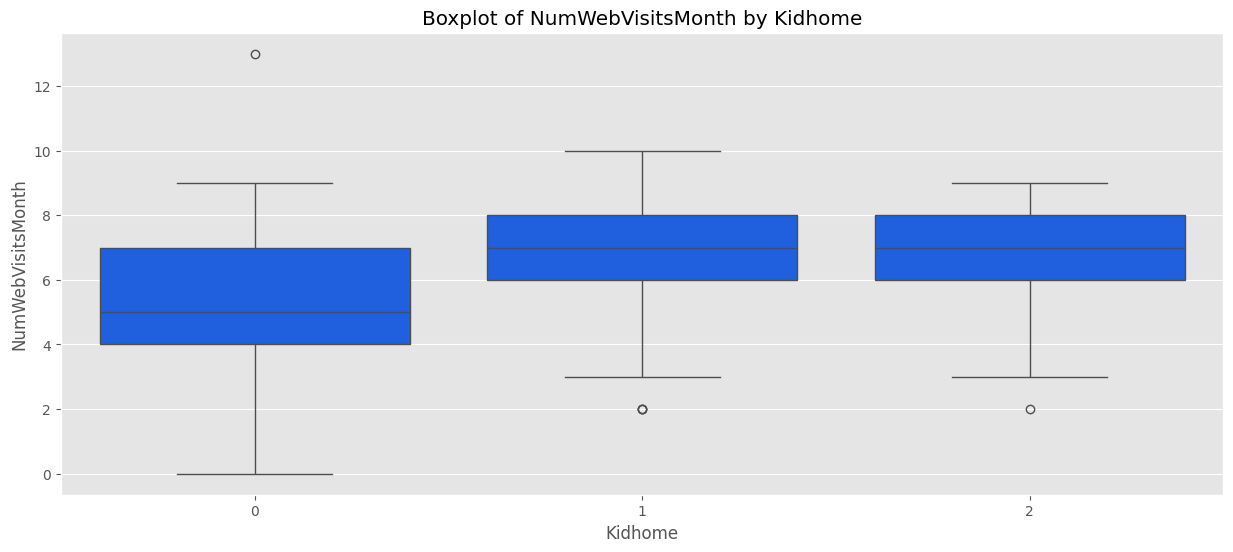

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Kidhome'], y=df1['NumWebVisitsMonth'], data=df1, color=c)
ax.set_xlabel('Kidhome')
ax.set_ylabel('NumWebVisitsMonth')
ax.set_title('Boxplot of NumWebVisitsMonth by Kidhome')
plt.show()

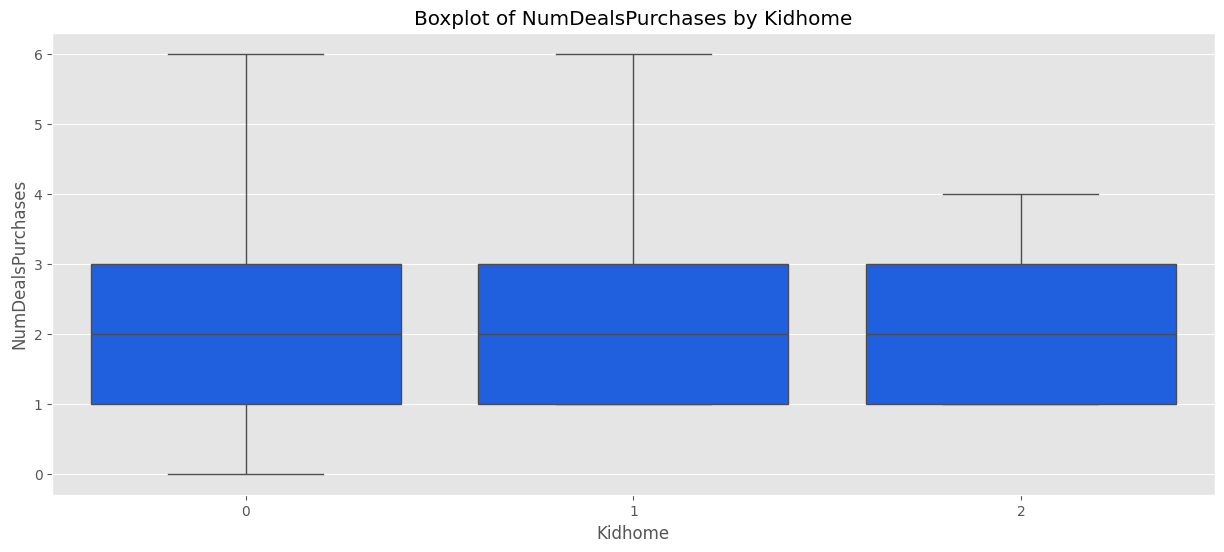

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Kidhome'], y=df1['NumDealsPurchases'], data=df1, color=c)
ax.set_xlabel('Kidhome')
ax.set_ylabel('NumDealsPurchases')
ax.set_title('Boxplot of NumDealsPurchases by Kidhome')
plt.show()

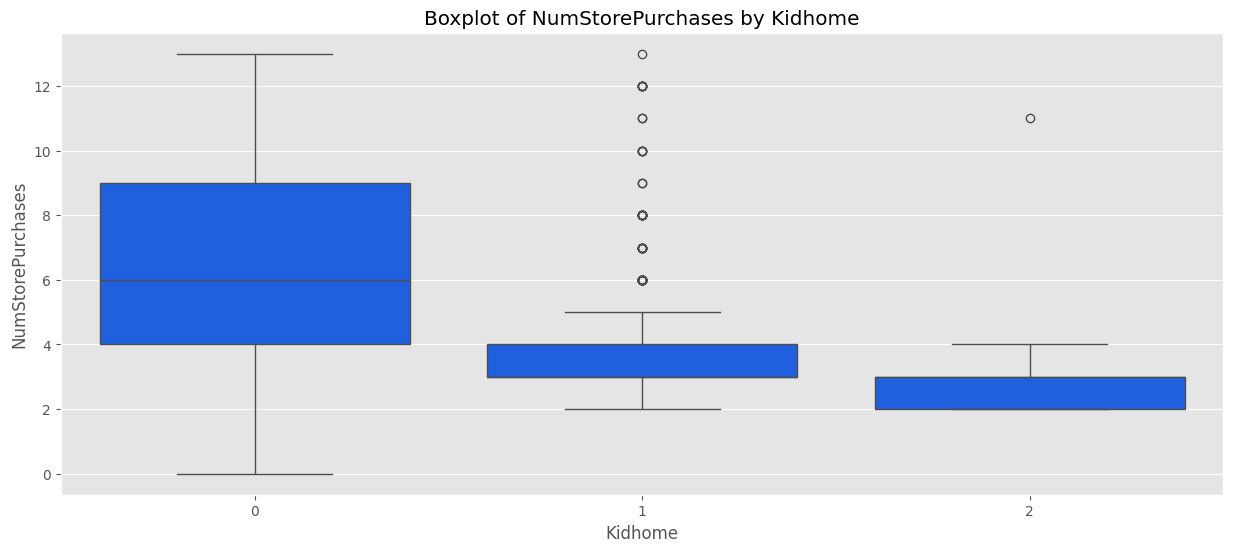

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Kidhome'], y=df1['NumStorePurchases'], data=df1, color=c)
ax.set_xlabel('Kidhome')
ax.set_ylabel('NumStorePurchases')
ax.set_title('Boxplot of NumStorePurchases by Kidhome')
plt.show()

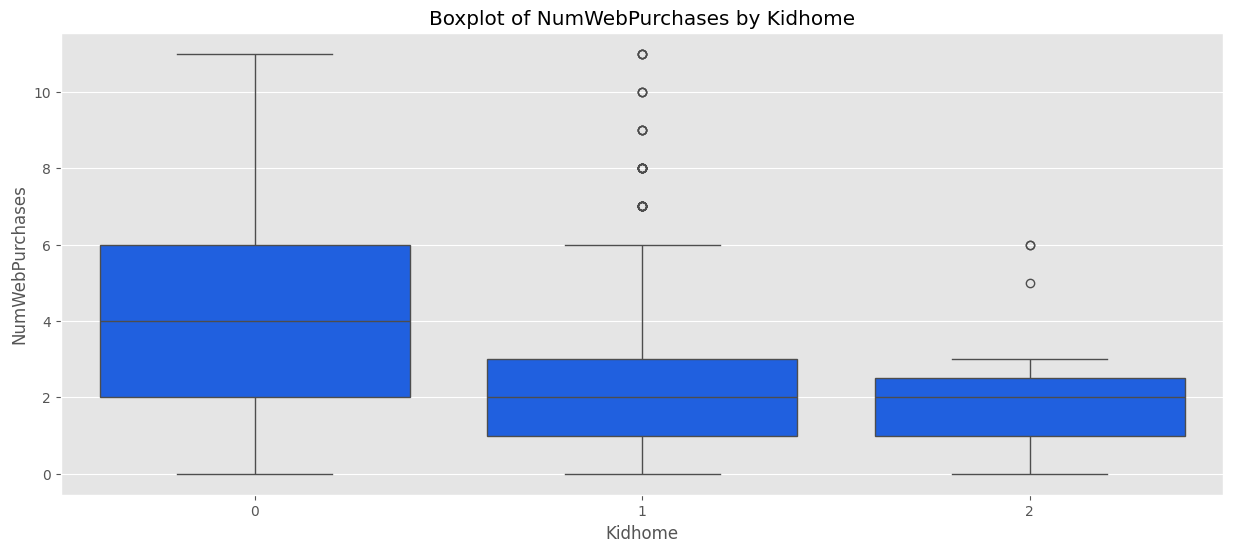

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(ax=ax, x=df1['Kidhome'], y=df1['NumWebPurchases'], data=df1, color=c)
ax.set_xlabel('Kidhome')
ax.set_ylabel('NumWebPurchases')
ax.set_title('Boxplot of NumWebPurchases by Kidhome')
plt.show()

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = df1.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head()

variable_1           variable_2         r     abs_r
39              MntWines    NumStorePurchases  0.765760  0.765760
156    NumStorePurchases             MntWines  0.765760  0.765760
144  NumCatalogPurchases      MntMeatProducts  0.745903  0.745903
66       MntMeatProducts  NumCatalogPurchases  0.745903  0.745903
38              MntWines  NumCatalogPurchases  0.745429  0.745429

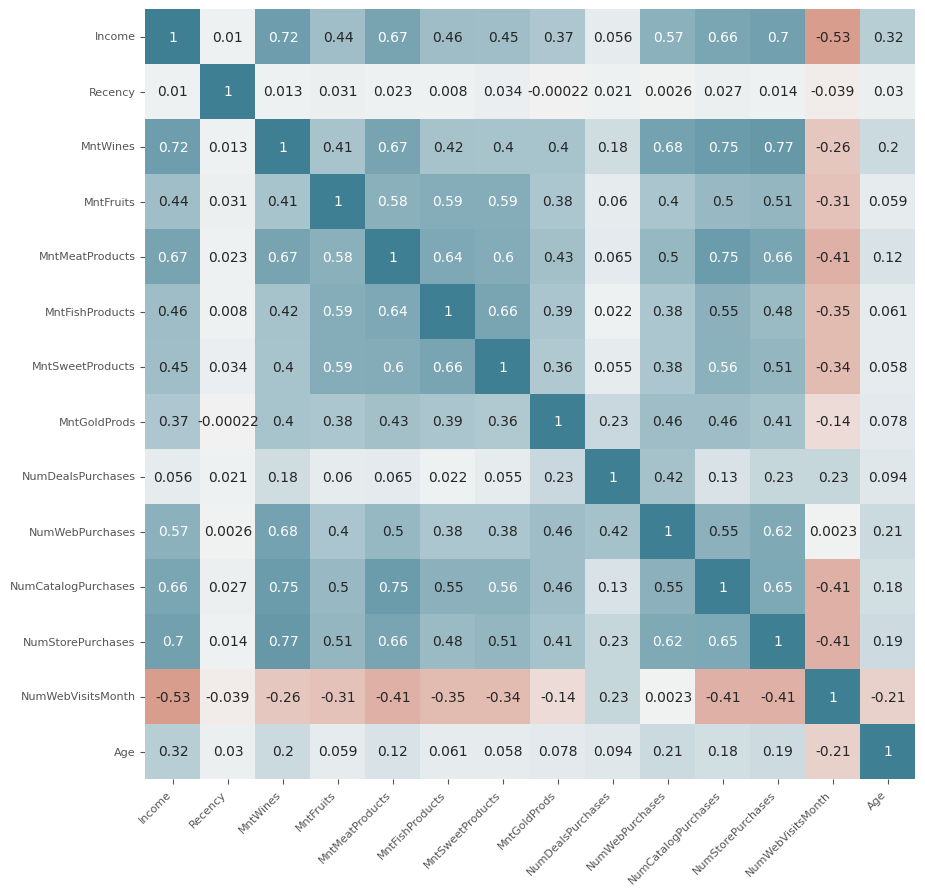

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            1534 non-null   category      
 1   Marital_Status       1534 non-null   category      
 2   Income               1534 non-null   float64       
 3   Kidhome              1534 non-null   category      
 4   Teenhome             1534 non-null   category      
 5   Dt_Customer          1534 non-null   datetime64[ns]
 6   Recency              1534 non-null   float64       
 7   MntWines             1534 non-null   float64       
 8   MntFruits            1534 non-null   float64       
 9   MntMeatProducts      1534 non-null   float64       
 10  MntFishProducts      1534 non-null   float64       
 11  MntSweetProducts     1534 non-null   float64       
 12  MntGoldProds         1534 non-null   float64       
 13  NumDealsPurchases    1534 non-nul

## Estandarización de variables

In [ ]:
# Escalado de las variables
# ==============================================================================
columns_to_scale = df1.drop(columns=['Dt_Customer','Education','Marital_Status'] + list(df1.select_dtypes(include='category').columns))

# Escalar los datos seleccionados
datos_scaled = scale(X=columns_to_scale, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=columns_to_scale.columns, index=columns_to_scale.index)
datos_scaled.head(4)


Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.168614 -0.380491 -0.669048  -0.597433        -0.638199        -0.565224   
1  1.645891 -0.793322  0.888614   2.452145         0.561382         4.111578   
2 -0.982972 -0.793322 -0.669048  -0.406834        -0.499404        -0.221972   
3  0.867177  1.546052 -0.060996   2.070948         0.472157         1.322659   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0         -0.601554     -0.701628          -0.190718        -0.970487   
1          0.668536      0.702289          -0.923957         1.896388   
2         -0.474545     -0.740625          -0.190718        -0.560934   
3          1.049564     -0.350649           2.008997         0.667727   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  
0            -0.257826          -1.002853          -0.472027  1.435049  
1             0.255151           1.869263          -0.981950  0.379365  
2            -0.770802          -0.284824           0.037895 -1.204161  
3             0.768127           0.433205          -0.472027 -0.940240

Usando una matriz de correlación, podemos observar que muchas categorías están correlacionadas entre sí. Por ejemplo, los diversos tipos de productos (por ejemplo, "MntVinos", "MntFrutas", "MntProductosPescado", "MntProductosCarne", etc.) están correlacionados positivamente entre sí. Además, factores como el número de compras (según el tipo de canal) están correlacionados positivamente con factores relacionados como el ingreso y el número de niños en casa. Algunas de estas correlaciones tienen sentido intuitivo. Por ejemplo, es comprensible que el ingreso esté positivamente correlacionado con compras de productos más costosos (como vinos, pescado, carne).

## Cálculo de distancias

In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:10,:10]

------------------
Distancia euclídea
------------------


0         1         2         3         4         5         6  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  7.721262       NaN       NaN       NaN       NaN       NaN       NaN   
2  3.139990  7.524688       NaN       NaN       NaN       NaN       NaN   
3  5.967851  5.532145  5.547212       NaN       NaN       NaN       NaN   
4  6.017055  5.458186  5.877782  4.765020       NaN       NaN       NaN   
5  7.051902  4.564343  6.613334  3.285389  3.639344       NaN       NaN   
6  3.773280  7.292820  1.695373  5.311848  5.500993  6.190170       NaN   
7  3.228758  8.052195  2.112605  6.491560  6.197342  7.152236  1.973728   
8  3.137425  8.002803  1.675153  6.327906  6.138473  7.154013  2.192966   
9  3.845335  7.954455  2.306191  5.980063  6.503545  6.954258  2.367186   

          7         8   9  
0       NaN       NaN NaN  
1       NaN       NaN NaN  
2       NaN       NaN NaN  
3       NaN       NaN NaN  
4       NaN       NaN NaN  
5       NaN       NaN NaN  
6       NaN       NaN NaN  
7       NaN       NaN NaN  
8  1.745364       NaN NaN  
9  2.405723  2.954294 NaN

In [ ]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="Cliente_b", value_name='distancia') \
    .rename_axis("cliente_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia')
#\
#    .head(3)

cliente_a  Cliente_b  distancia
1509115       1193        983   0.000000
399821         981        260   0.000000
852443        1073        555   0.000000
1874369       1355       1221   0.000000
279442         254        182   0.000000
...            ...        ...        ...
190196        1514        123  12.805717
1325356       1514        863  12.823627
1319220       1514        859  13.062272
1764080       1514       1149  13.062272
2184396       1514       1423  13.162489

[1175811 rows x 3 columns]

## K-Means Clustering

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

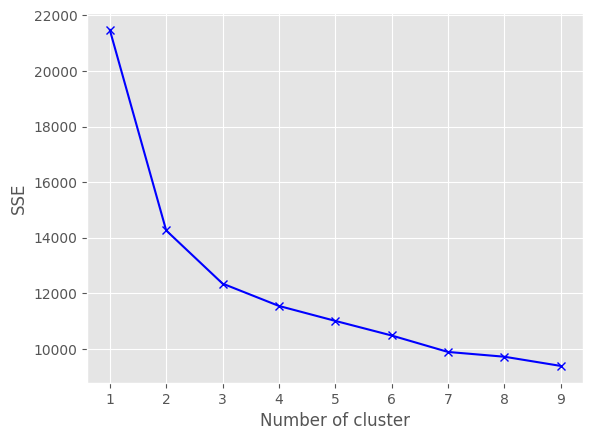

In [ ]:
#Empty dictionary to store the SSE for each value of k
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datos_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

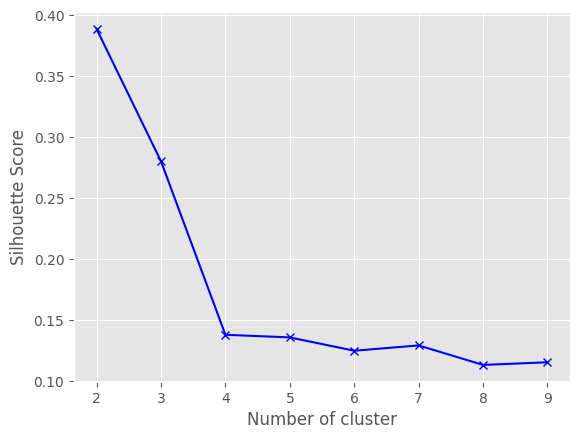

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datos_scaled)
    labels = kmeans.predict(datos_scaled)
    sc[k] = silhouette_score(datos_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Modelo
# ==============================================================================
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(datos_scaled)

#Adding predicted labels to the original data and scaled data
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = datos_scaled.copy(deep=True)
data_scaled_copy['KMeans_Labels'] = kmeans.predict(datos_scaled)
df1['KMeans_Labels'] = kmeans.predict(datos_scaled)

In [ ]:
df1['KMeans_clusters'] = kmeans.labels_ # Agregando la clasificacion de los clusters a la base de datos
df1

Education Marital_Status   Income Kidhome Teenhome Dt_Customer  \
0     Graduation         Single  46344.0       1        1  2014-08-03   
1     Graduation       Together  71613.0       0        0  2013-08-21   
2     Graduation       Together  26646.0       1        0  2014-10-02   
3            PhD        Married  58293.0       1        0  2014-01-19   
4         Master       Together  62513.0       0        1  2013-09-09   
...          ...            ...      ...     ...      ...         ...   
1529  Graduation         Single  26816.0       0        0  2012-08-17   
1530  Graduation        Married  34421.0       1        0  2013-01-07   
1531  Graduation       Divorced  56981.0       0        0  2014-01-25   
1532      Master       Together  69245.0       0        1  2014-01-24   
1533         PhD        Married  52869.0       1        1  2012-10-15   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  \
0        38.0      11.0        1.0              6.0  ...             0   
1        26.0     426.0       49.0            127.0  ...             0   
2        26.0      11.0        4.0             20.0  ...             0   
3        94.0     173.0       43.0            118.0  ...             0   
4        16.0     520.0       42.0             98.0  ...             0   
...       ...       ...        ...              ...  ...           ...   
1529     50.0       5.0        1.0              6.0  ...             0   
1530     81.0       3.0        3.0              7.0  ...             0   
1531     91.0     908.0       48.0            217.0  ...             0   
1532      8.0     428.0       30.0            214.0  ...             0   
1533     40.0      84.0        3.0             61.0  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
1529             0             0             0             0         0   
1530             0             0             0             0         0   
1531             1             0             0             0         0   
1532             0             0             0             0         0   
1533             0             0             0             0         0   

      Response   Age KMeans_Labels KMeans_clusters  
0            0  60.0             1               1  
1            0  48.0             0               0  
2            0  30.0             1               1  
3            0  33.0             2               2  
4            0  46.0             0               0  
...        ...   ...           ...             ...  
1529         0  26.0             1               1  
1530         0  39.0             1               1  
1531         0  33.0             0               0  
1532         0  58.0             0               0  
1533         1  58.0             1               1  

[1534 rows x 28 columns]

In [ ]:
df1['KMeans_Labels'].value_counts()

KMeans_Labels
1    921
2    384
0    229
Name: count, dtype: int64

In [ ]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
mean = df1.groupby('KMeans_Labels')[numeric_columns].mean()
median = df1.groupby('KMeans_Labels')[numeric_columns].median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = [
    'group_0 Mean', 'group_1 Mean', 'group_2 Mean',
    'group_0 Median', 'group_1 Median', 'group_2 Median'
]
df_kmeans.T

group_0 Mean  group_1 Mean  group_2 Mean  group_0 Median  \
Income               67851.349345  33501.057546  52799.406250         68117.0   
Recency                 50.751092     48.916395     48.395833            53.0   
MntWines               547.834061     30.994571    354.976562           520.0   
MntFruits               35.213974      4.070575     10.796875            31.0   
MntMeatProducts        253.737991     17.650380     87.479167           232.0   
MntFishProducts         54.537118      5.646037     14.549479            52.0   
MntSweetProducts        36.659389      4.208469      9.880208            33.0   
MntGoldProds            44.720524     12.521173     39.140625            38.0   
NumDealsPurchases        2.043668      1.857763      3.354167             2.0   
NumWebPurchases          5.497817      1.868621      5.700521             5.0   
NumCatalogPurchases      4.668122      0.437568      2.169271             4.0   
NumStorePurchases        8.803493      3.068404      6.539062             9.0   
NumWebVisitsMonth        3.720524      6.396308      6.111979             4.0   
Age                     45.978166     41.374593     47.869792            46.0   
KMeans_Labels            0.000000      1.000000      2.000000             0.0   
KMeans_clusters          0.000000      1.000000      2.000000             0.0   

                     group_1 Median  group_2 Median  
Income                      33562.0         52605.5  
Recency                        49.0            50.0  
MntWines                       18.0           273.0  
MntFruits                       2.0             7.0  
MntMeatProducts                13.0            74.5  
MntFishProducts                 3.0            10.0  
MntSweetProducts                2.0             7.0  
MntGoldProds                    9.0            30.5  
NumDealsPurchases               2.0             3.0  
NumWebPurchases                 2.0             6.0  
NumCatalogPurchases             0.0             2.0  
NumStorePurchases               3.0             6.0  
NumWebVisitsMonth               7.0             6.0  
Age                            41.0            48.0  
KMeans_Labels                   1.0             2.0  
KMeans_clusters                 1.0             2.0

In [ ]:
df1['KMeans_clusters'] = df1['KMeans_clusters'].astype('category')
df1['KMeans_Labels'] = df1['KMeans_Labels'].astype('category')

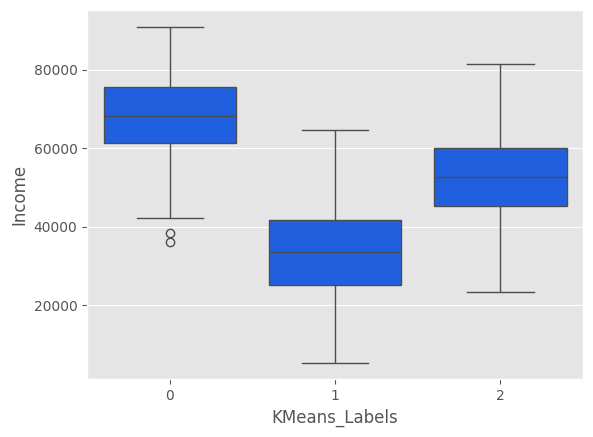

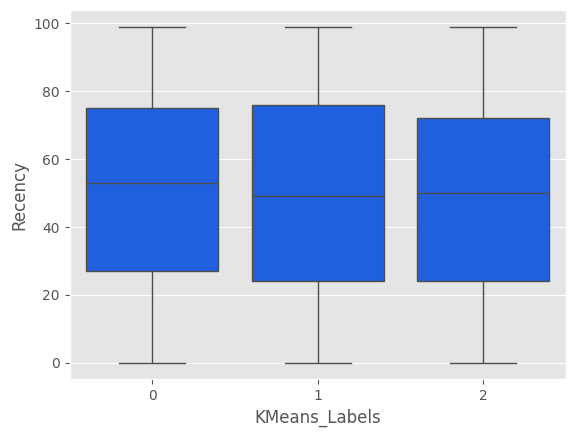

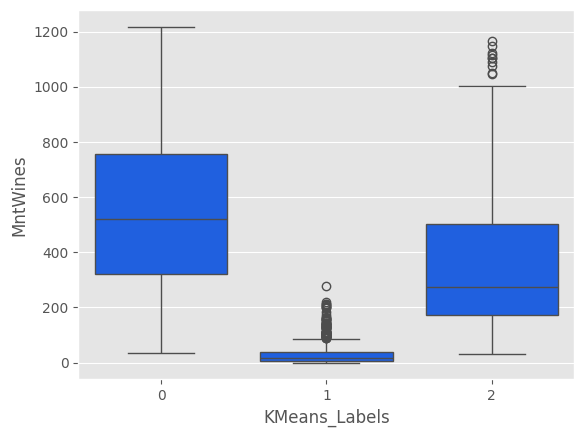

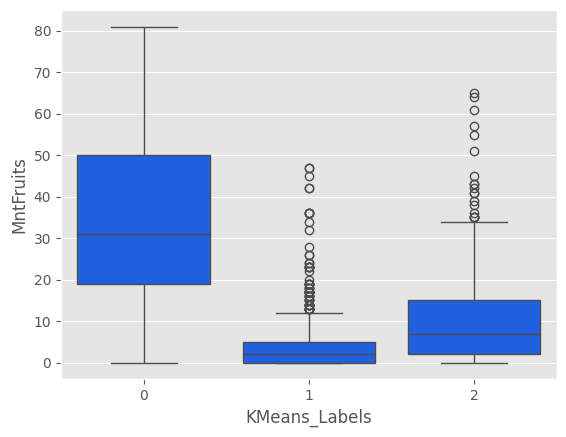

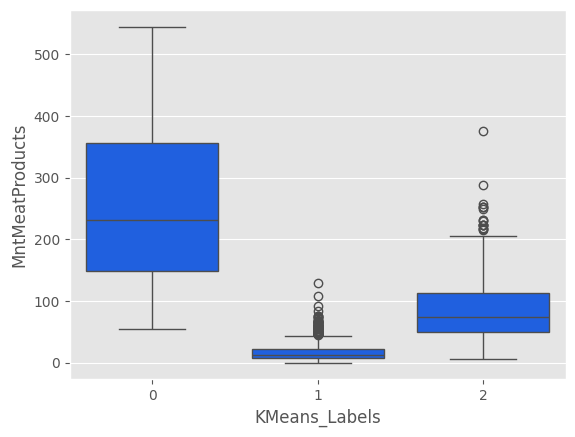

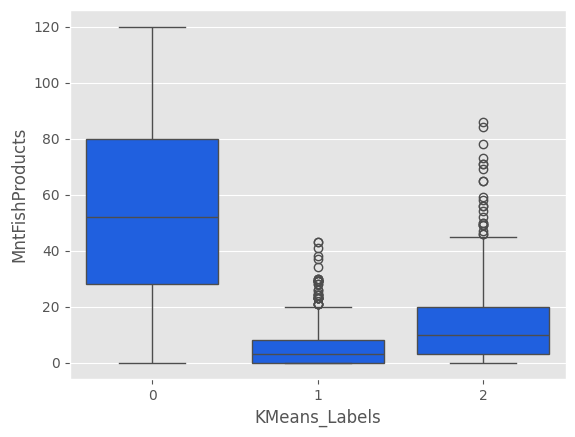

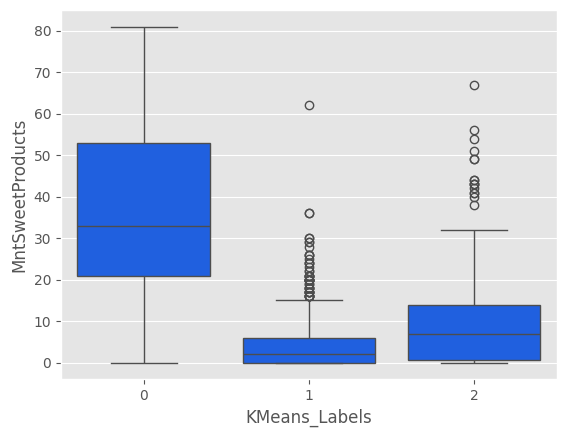

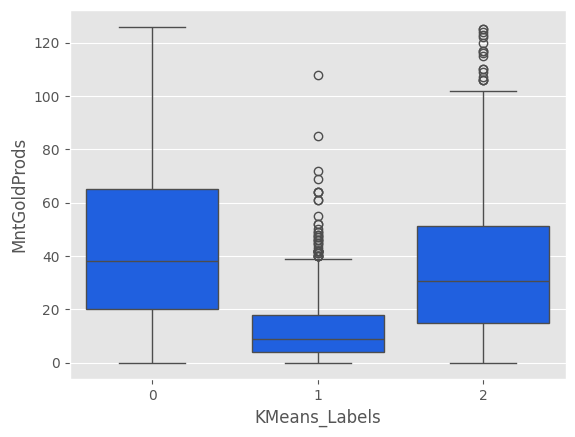

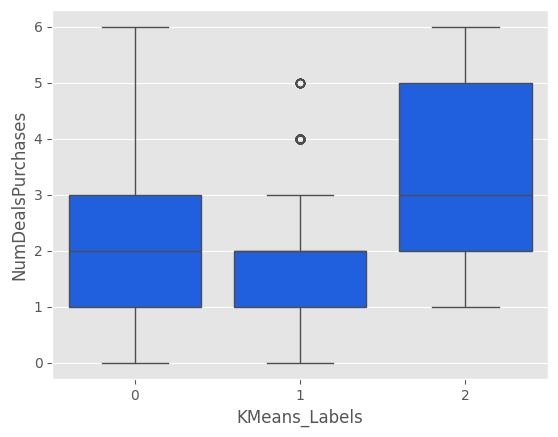

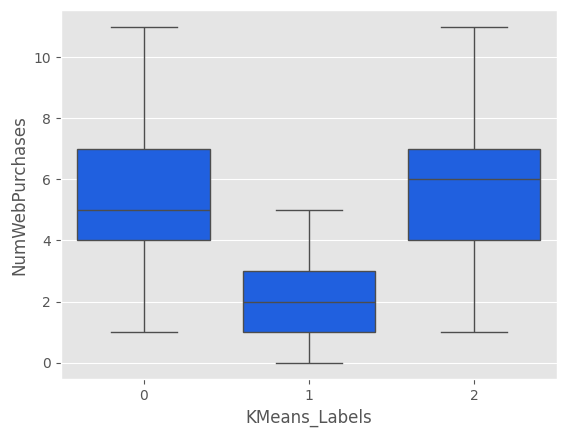

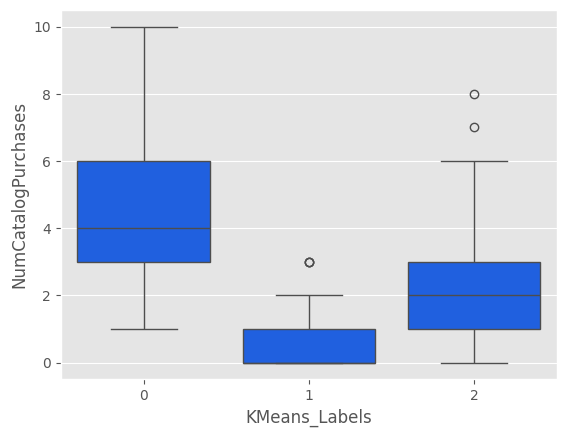

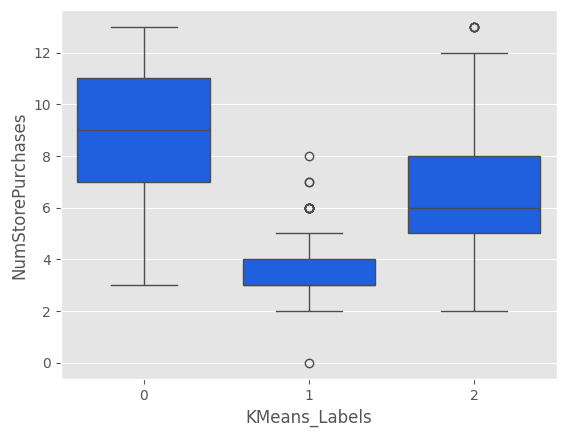

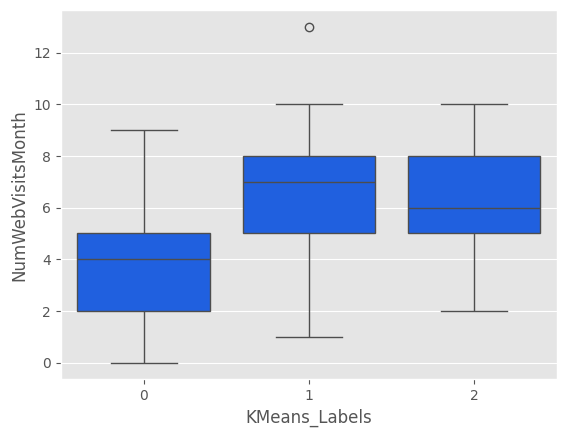

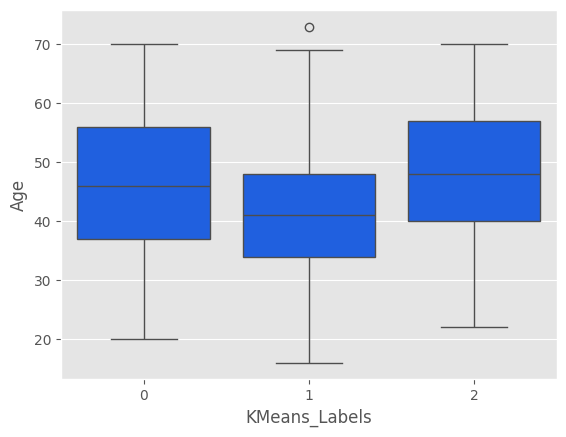

In [ ]:
cols_visualise = df1.select_dtypes(include=['int64','float64']).columns

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = df1)
    plt.show()

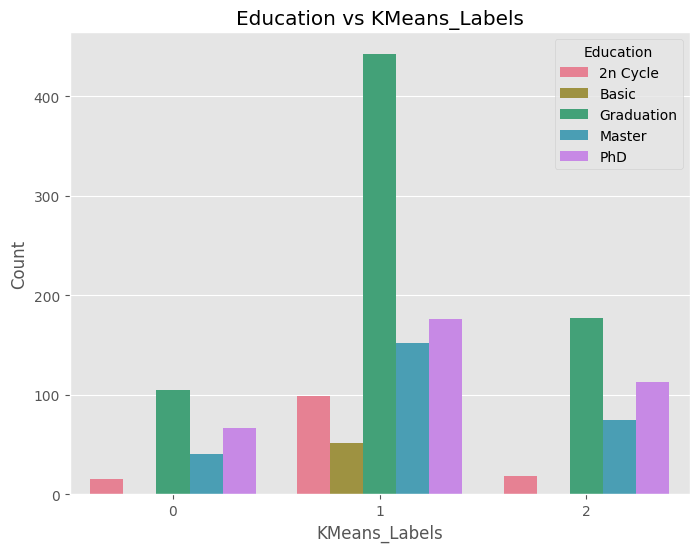

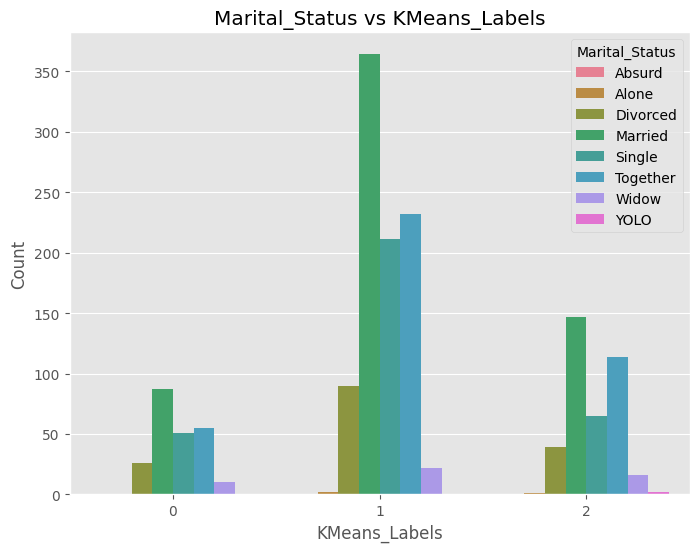

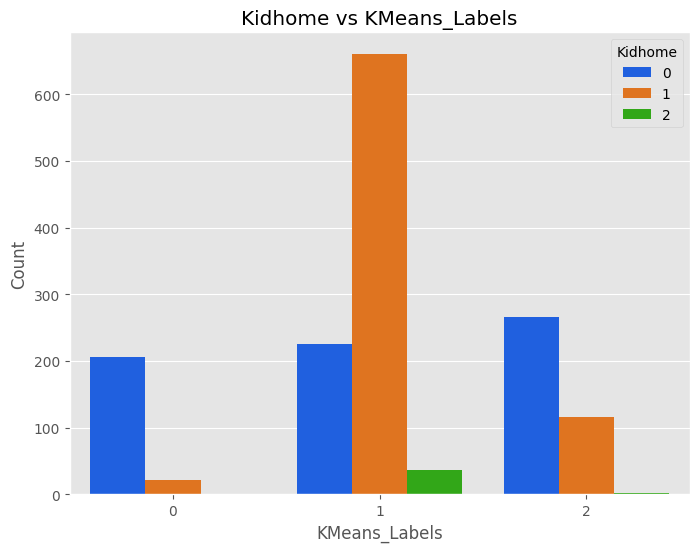

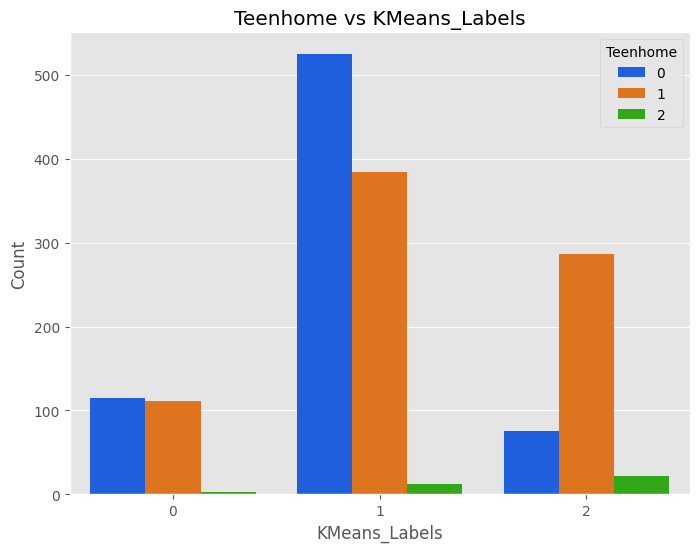

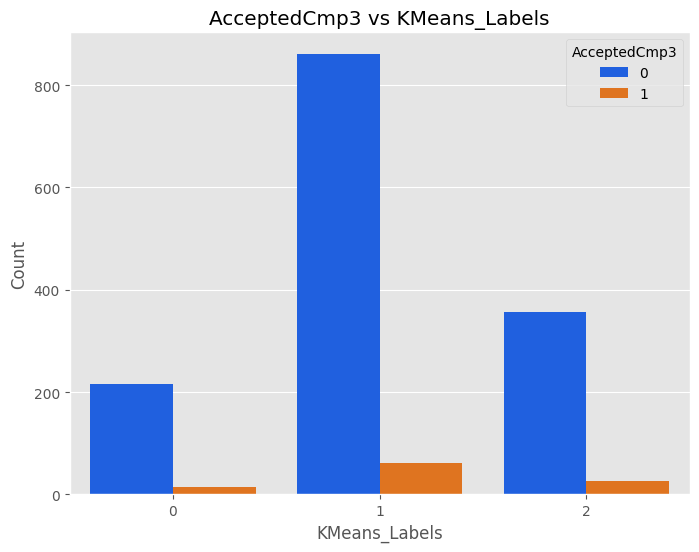

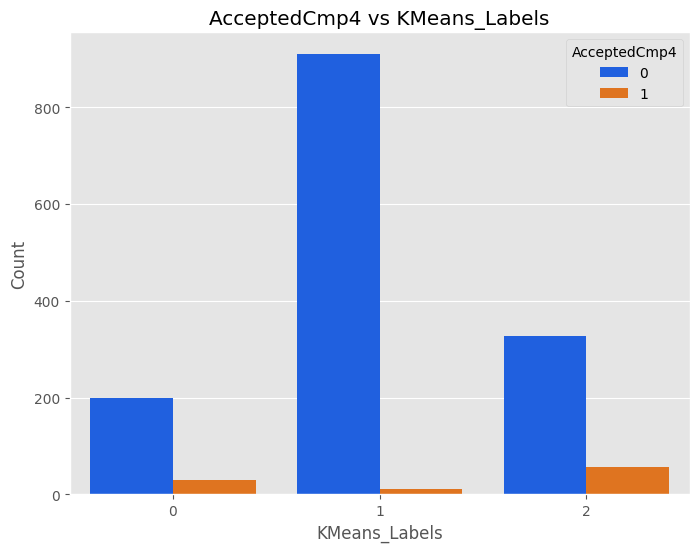

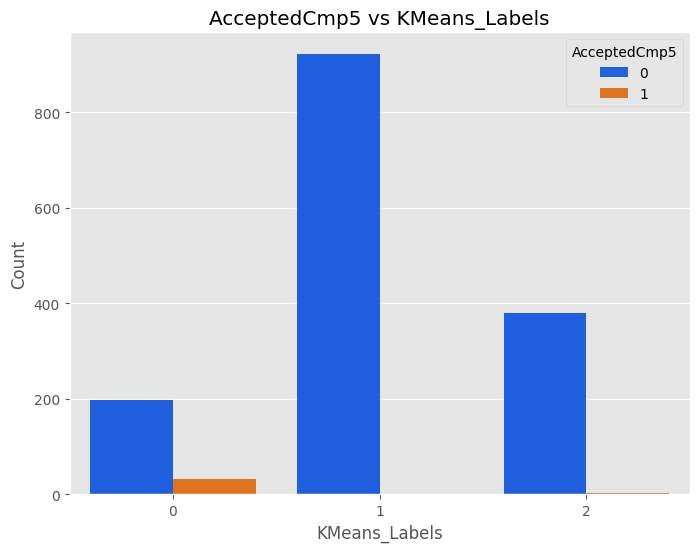

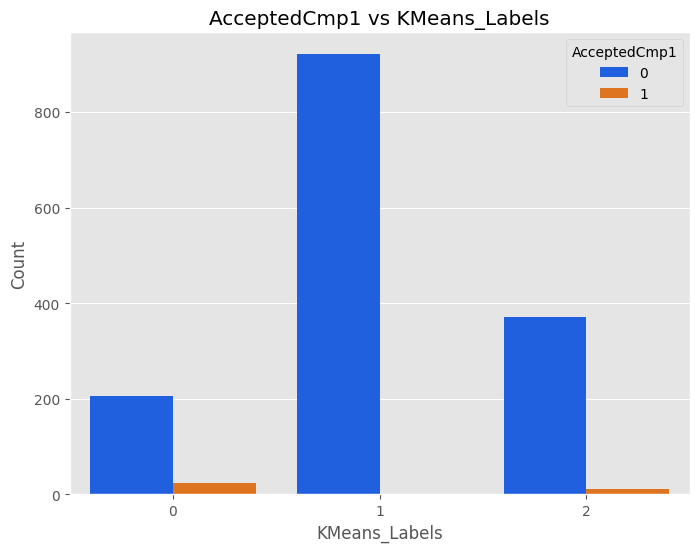

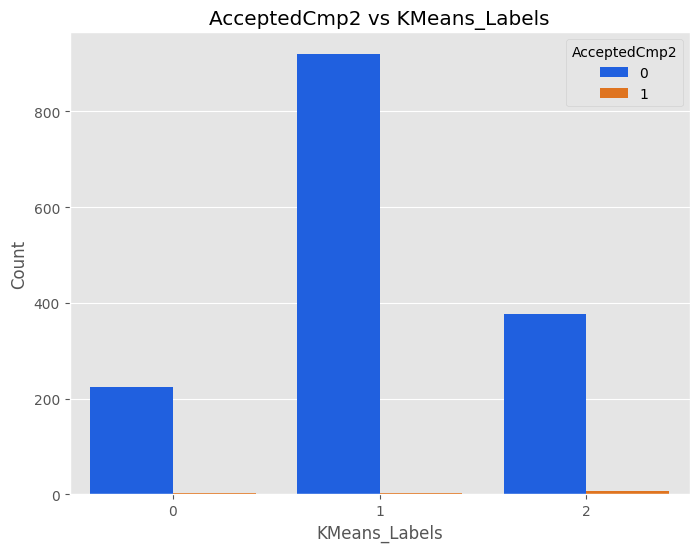

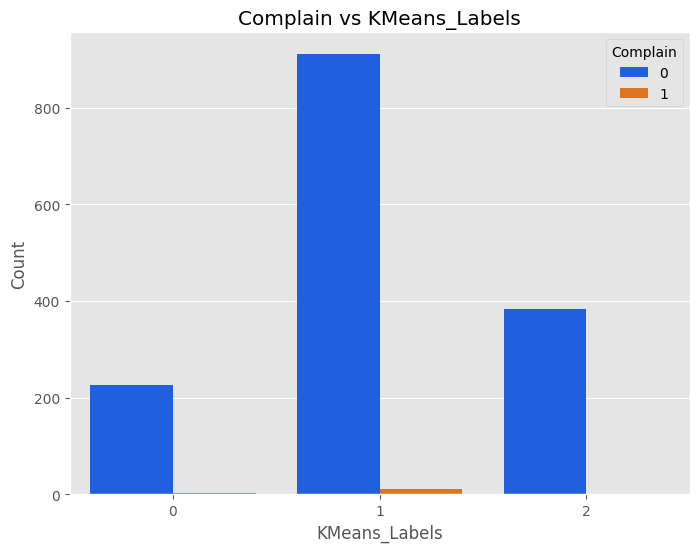

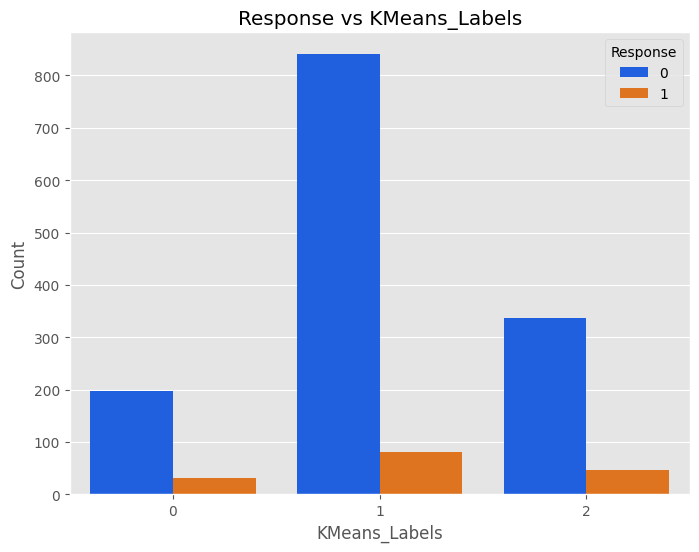

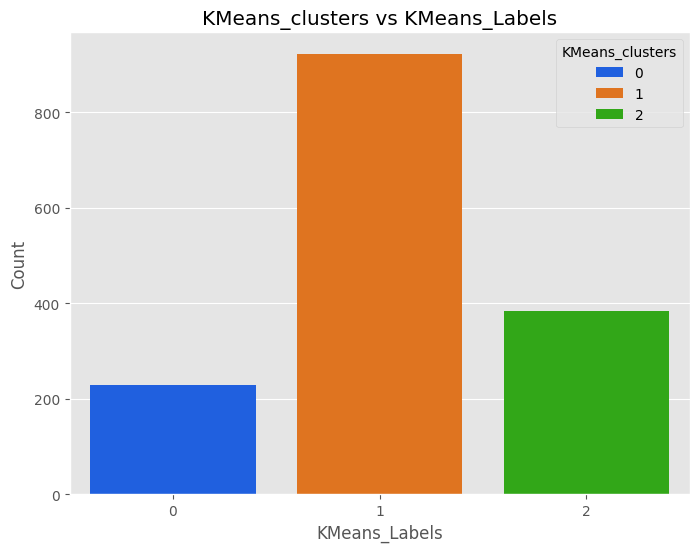

In [ ]:
cols_visualise = df1.select_dtypes(include='category').columns.drop('KMeans_Labels')


for col in cols_visualise:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='KMeans_Labels', hue=col, data=df1)
    plt.title(f'{col} vs KMeans_Labels')
    plt.xlabel('KMeans_Labels')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.show()



In [ ]:
from sklearn import metrics

# Evaluar la calidad del clustering
silhouette_score = metrics.silhouette_score(data_scaled_copy, data_scaled_copy['KMeans_Labels'])
calinski_harabasz_score = metrics.calinski_harabasz_score(data_scaled_copy, data_scaled_copy['KMeans_Labels'])
davies_bouldin_score = metrics.davies_bouldin_score(data_scaled_copy, data_scaled_copy['KMeans_Labels'])

print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")

Silhouette Score: 0.3001972676923445
Calinski-Harabasz Score: 602.8260363263687
Davies-Bouldin Score: 1.556289653927067


### Resumen:

- **Silhouette Score** (0.30): Indica que los clústeres tienen una definición moderada, pero podrían mejorarse. Los puntos dentro de los clústeres no están tan cohesivos como se esperaría y puede haber solapamientos significativos entre clústeres adyacentes.
- **Calinski-Harabasz Score** (602.83): Existe una separación razonablemente buena entre los clústeres, lo que implica que cada grupo tiene características distintivas.
- **Davies-Bouldin Score** (1.56): Indica que hay cierta superposición entre los clústeres, lo que podría dificultar su diferenciación. Esto podría deberse a que los puntos cercanos a los bordes de los clústeres están distribuidos de manera más difusa.

En conjunto, estos resultados sugieren que el clustering realizado es razonablemente bueno, pero hay margen para mejorar. Podrías considerar ajustar los parámetros del algoritmo de clustering, probar con un número diferente de clusters, o usar un algoritmo de clustering diferente para ver si puedes obtener una mejor separación y definición de los clusters.

## K-Medoids Clustering

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(datos_scaled)
data_scaled_copy = datos_scaled.copy(deep=True)
data_scaled_copy['kmedoLabels'] = kmedo.predict(datos_scaled)
df1['kmedoLabels'] = kmedo.predict(datos_scaled)

In [ ]:
df1.kmedoLabels.value_counts()

kmedoLabels
2    657
0    461
1    416
Name: count, dtype: int64

In [ ]:
# Seleccionar solo columnas numéricas
numeric_columns = df1.select_dtypes(include=[np.number]).columns

# Calcular la media y la mediana solo para las columnas numéricas
mean = df1.groupby('KMeans_Labels')[numeric_columns].mean()
median = df1.groupby('KMeans_Labels')[numeric_columns].median()  # Asegúrate de usar las etiquetas correctas

# Concatenar las medias y las medianas
df_kmeans = pd.concat([mean, median], axis=0)

# Ajustar el índice para reflejar medias y medianas para cada grupo
df_kmeans.index = [
    'group_0 Mean', 'group_1 Mean', 'group_2 Mean',
    'group_0 Median', 'group_1 Median', 'group_2 Median'
]

# Transponer el DataFrame para una mejor legibilidad
df_kmeans.T

group_0 Mean  group_1 Mean  group_2 Mean  group_0 Median  \
Income               67851.349345  33501.057546  52799.406250         68117.0   
Recency                 50.751092     48.916395     48.395833            53.0   
MntWines               547.834061     30.994571    354.976562           520.0   
MntFruits               35.213974      4.070575     10.796875            31.0   
MntMeatProducts        253.737991     17.650380     87.479167           232.0   
MntFishProducts         54.537118      5.646037     14.549479            52.0   
MntSweetProducts        36.659389      4.208469      9.880208            33.0   
MntGoldProds            44.720524     12.521173     39.140625            38.0   
NumDealsPurchases        2.043668      1.857763      3.354167             2.0   
NumWebPurchases          5.497817      1.868621      5.700521             5.0   
NumCatalogPurchases      4.668122      0.437568      2.169271             4.0   
NumStorePurchases        8.803493      3.068404      6.539062             9.0   
NumWebVisitsMonth        3.720524      6.396308      6.111979             4.0   
Age                     45.978166     41.374593     47.869792            46.0   
kmedoLabels              0.000000      1.618893      0.622396             0.0   

                     group_1 Median  group_2 Median  
Income                      33562.0         52605.5  
Recency                        49.0            50.0  
MntWines                       18.0           273.0  
MntFruits                       2.0             7.0  
MntMeatProducts                13.0            74.5  
MntFishProducts                 3.0            10.0  
MntSweetProducts                2.0             7.0  
MntGoldProds                    9.0            30.5  
NumDealsPurchases               2.0             3.0  
NumWebPurchases                 2.0             6.0  
NumCatalogPurchases             0.0             2.0  
NumStorePurchases               3.0             6.0  
NumWebVisitsMonth               7.0             6.0  
Age                            41.0            48.0  
kmedoLabels                     2.0             0.0

In [ ]:
df1['kmedoLabels'] = df1['kmedoLabels'].astype('category')

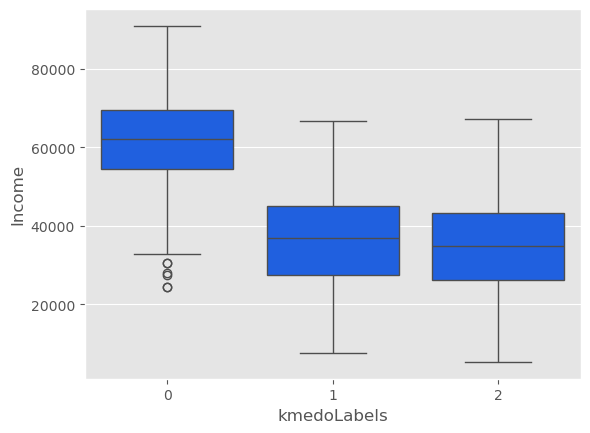

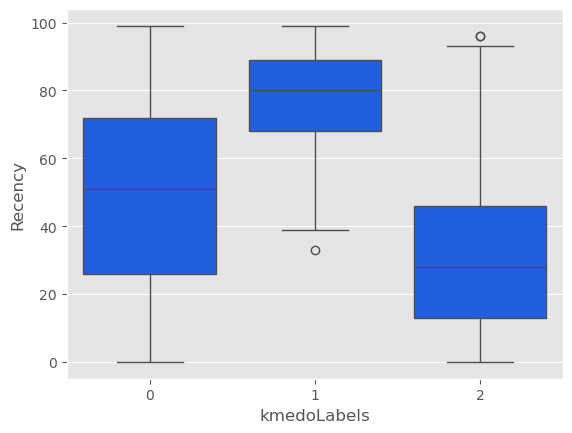

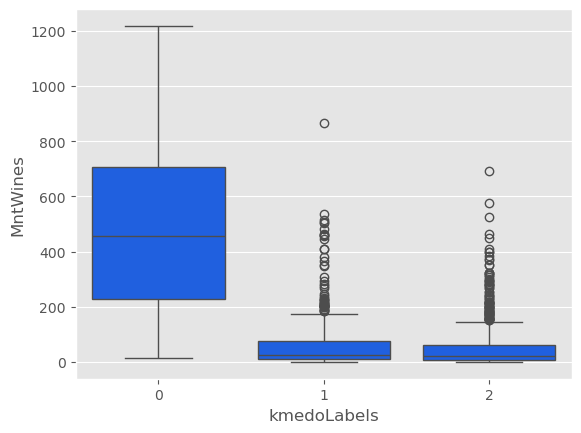

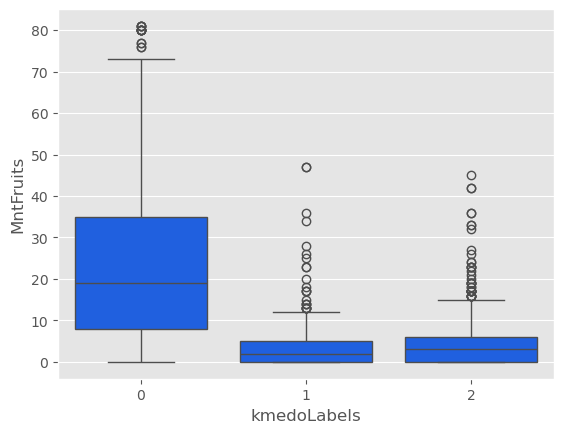

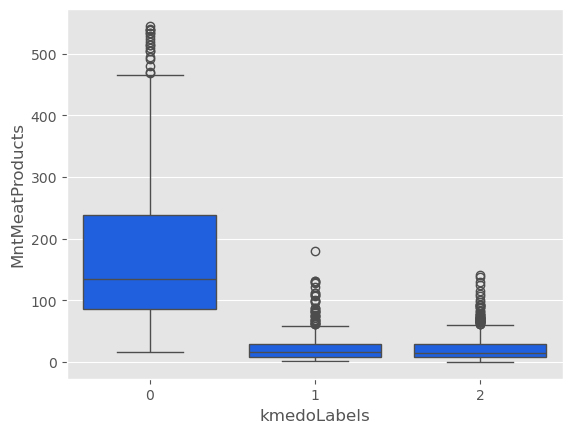

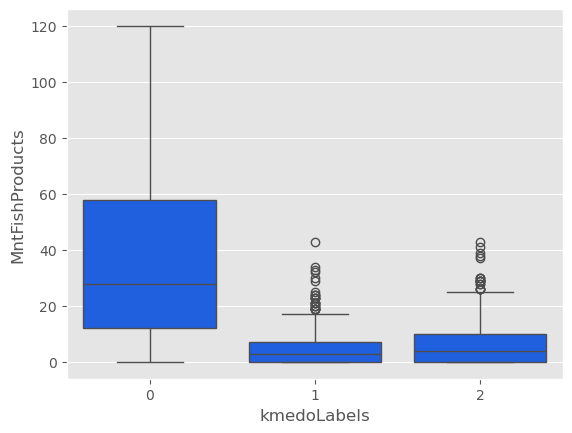

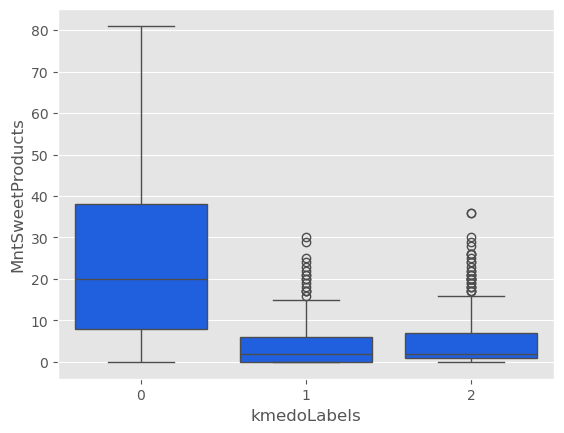

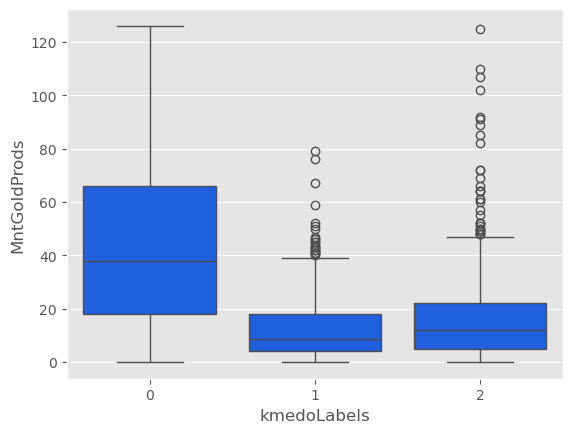

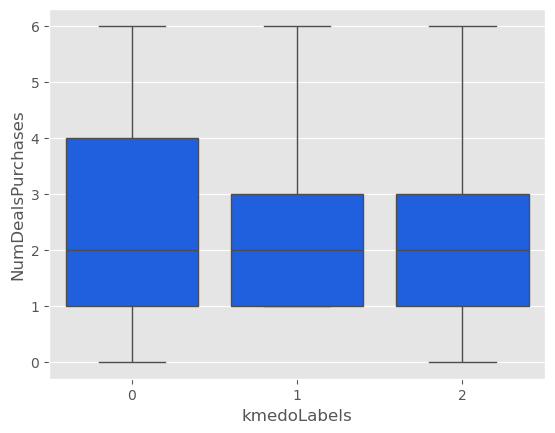

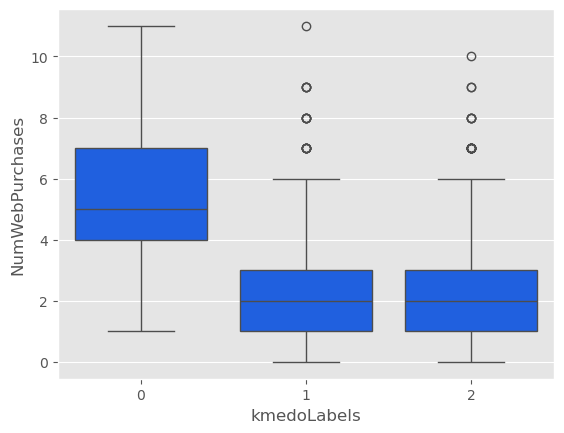

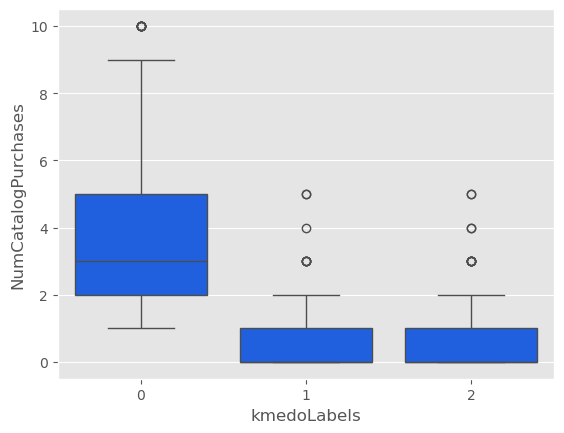

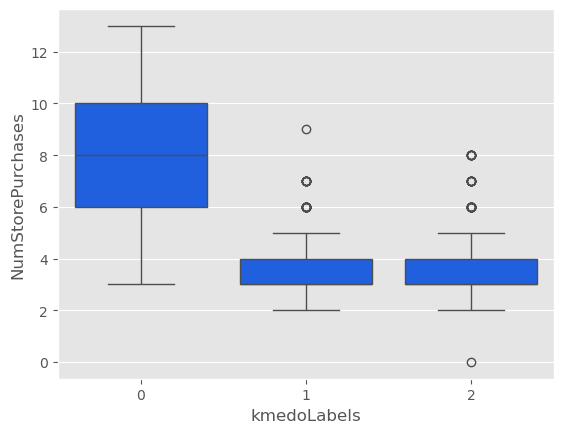

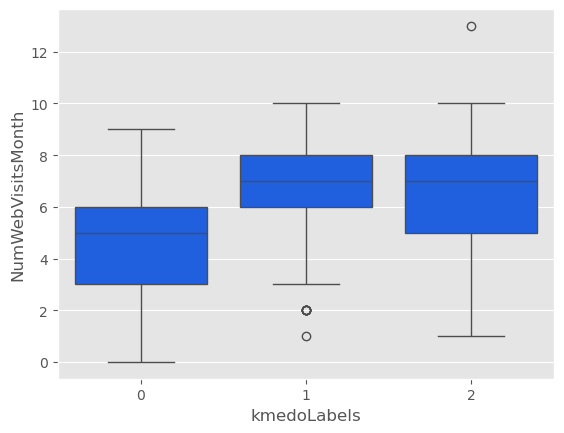

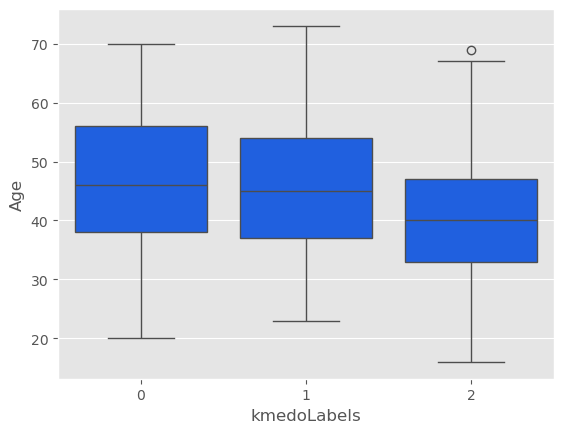

In [ ]:
cols_visualise = df1.select_dtypes(include=['int64','float64']).columns

for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = df1)
    plt.show()

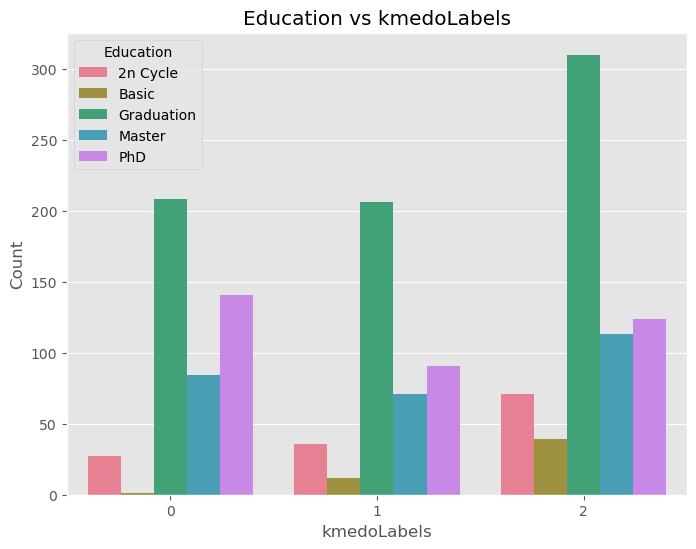

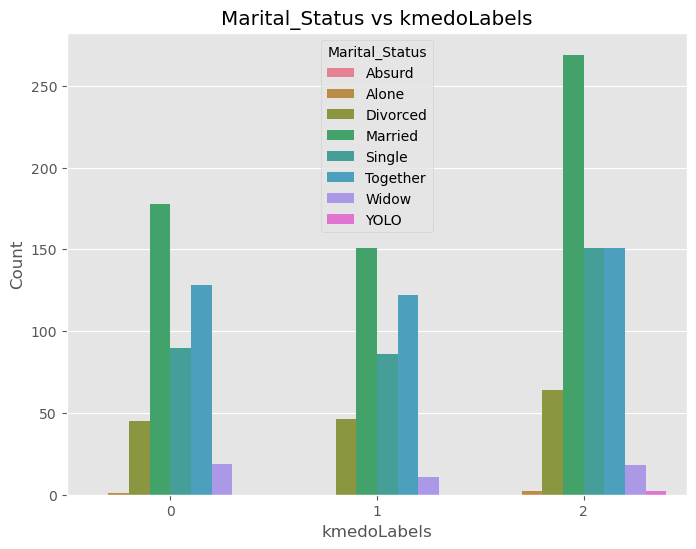

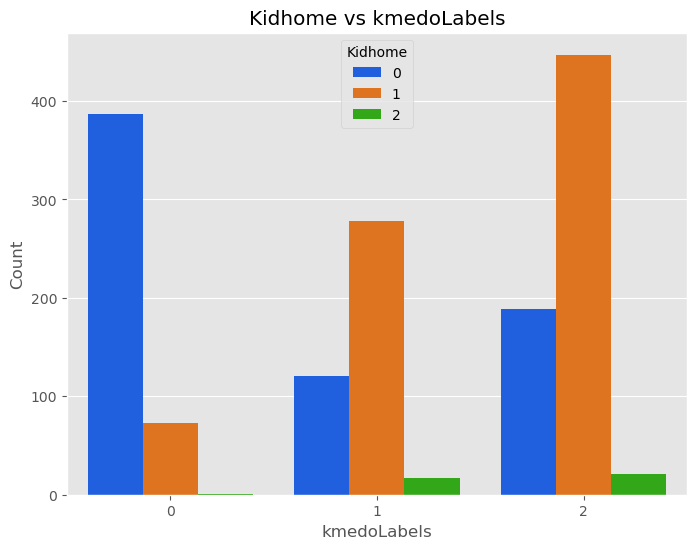

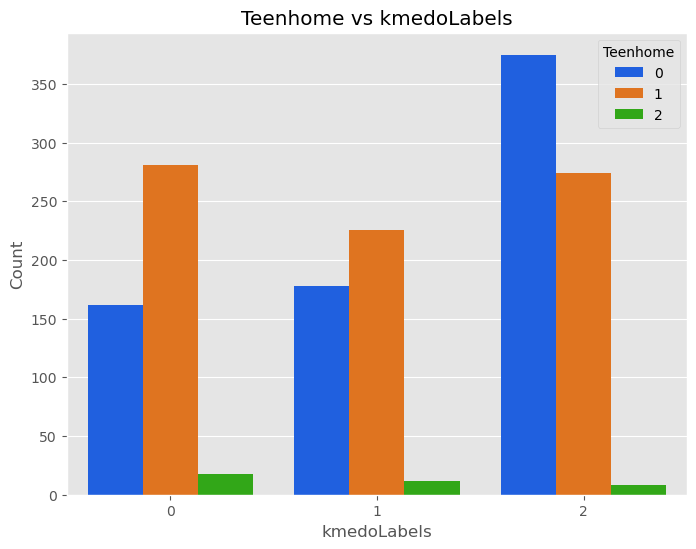

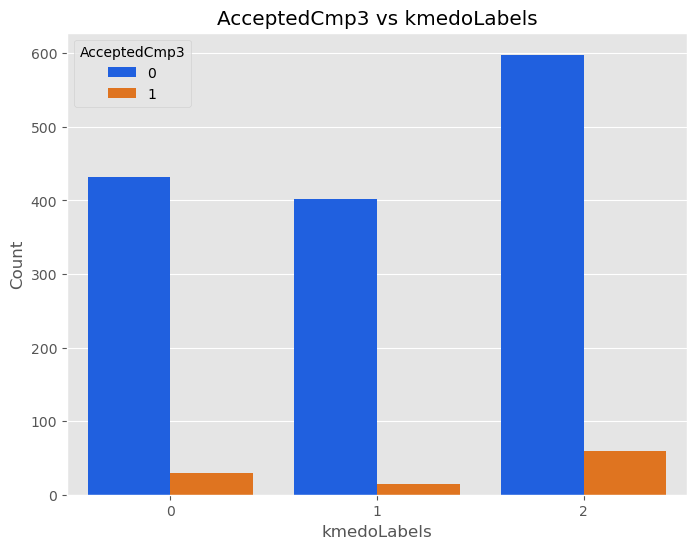

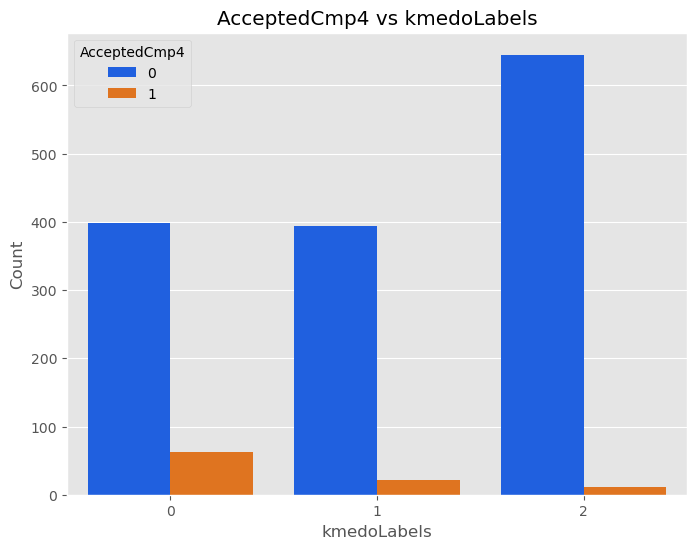

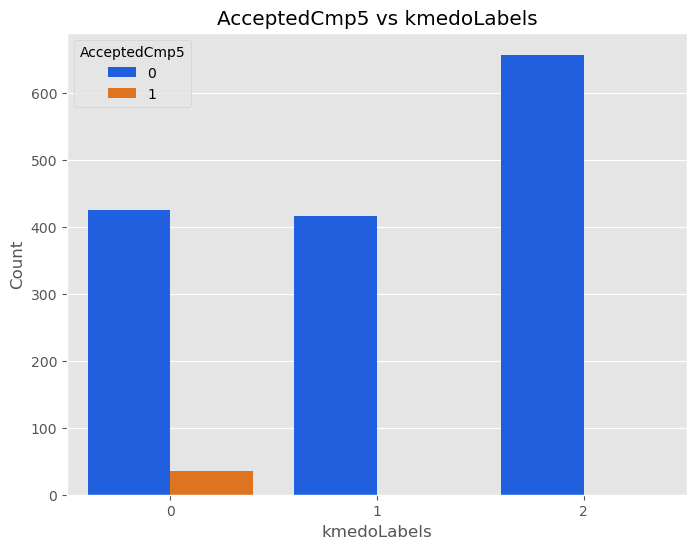

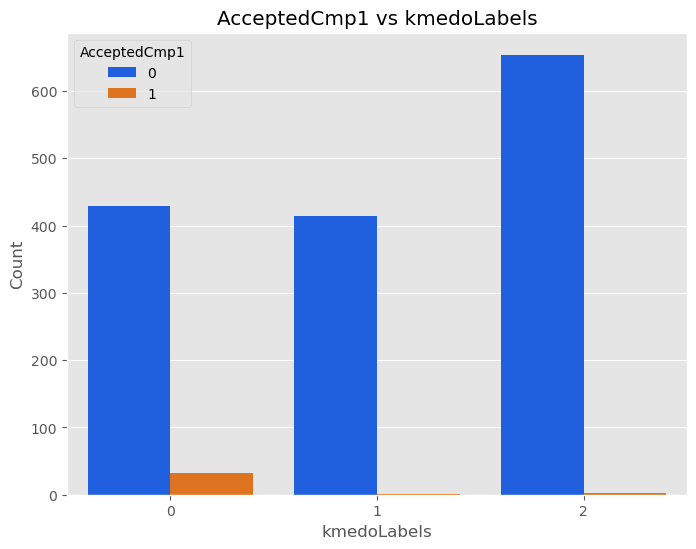

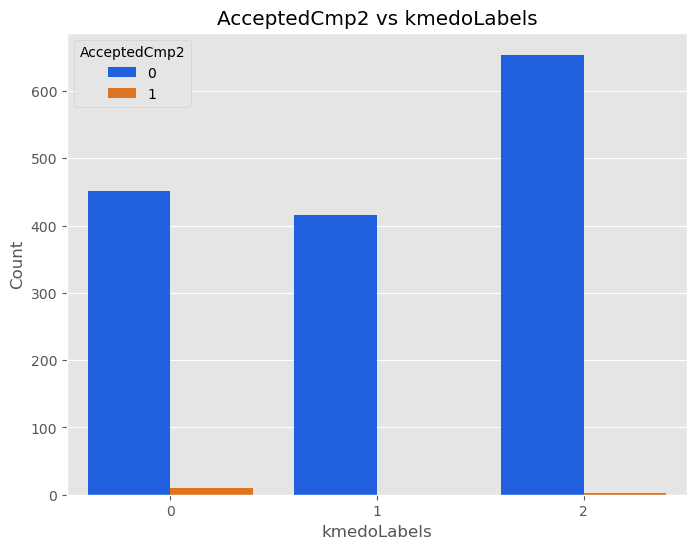

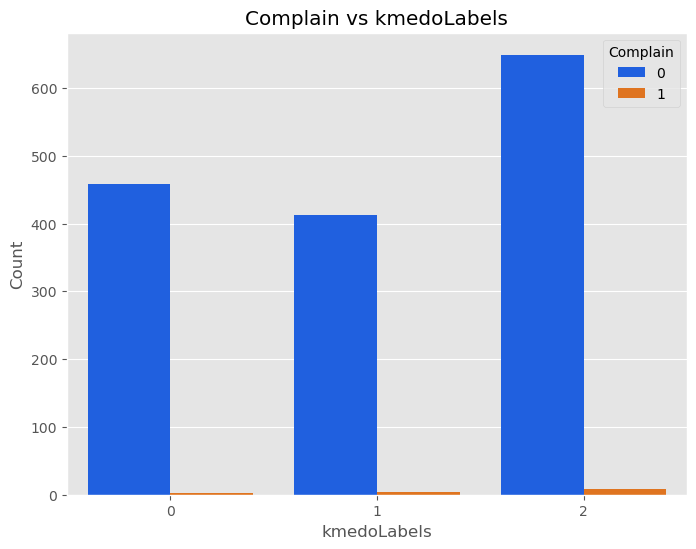

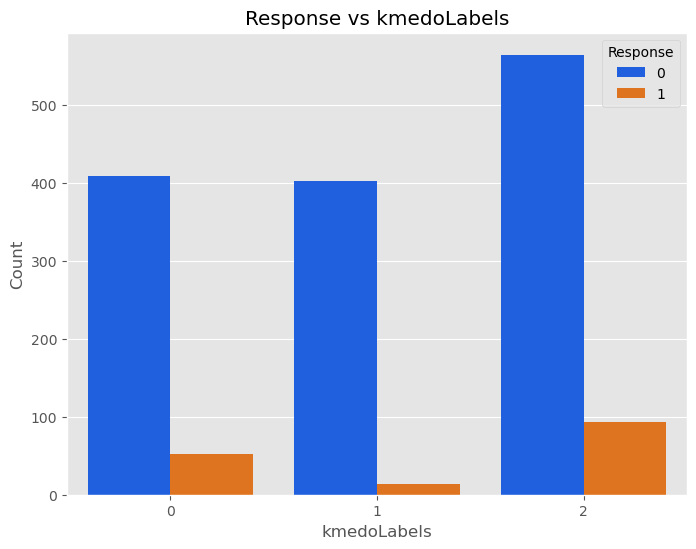

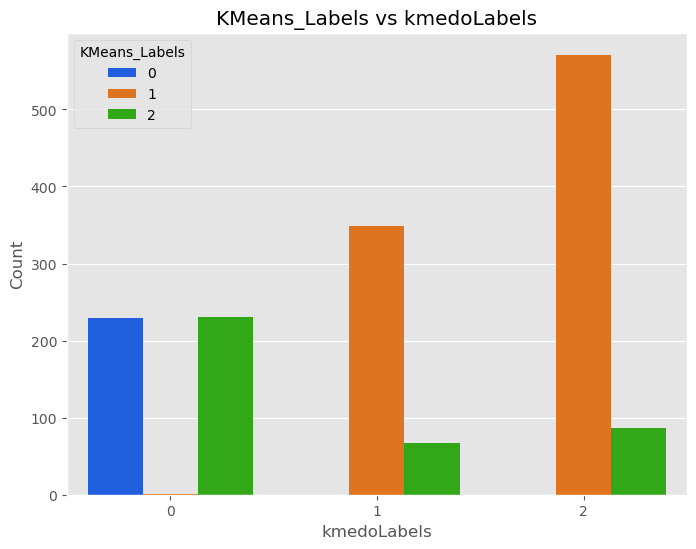

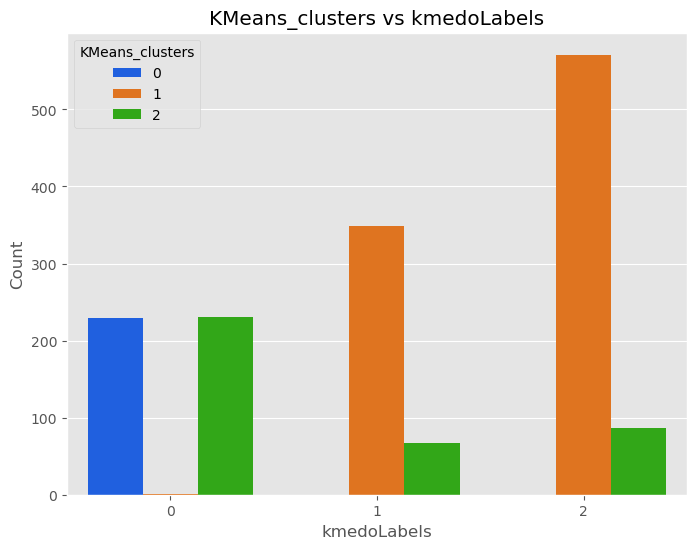

In [ ]:
cols_visualise = df1.select_dtypes(include='category').columns.drop('kmedoLabels')


for col in cols_visualise:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='kmedoLabels', hue=col, data=df1)
    plt.title(f'{col} vs kmedoLabels')
    plt.xlabel('kmedoLabels')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.show()



Podemos categorizar los tres clusters de la siguiente manera:

**Clúster 1:**

- Ingresos y gastos más altos
- Menor gasto promedio en ofertas y menor número de visitas en la web
- Objetivo más efectivo de promociones (aunque solo un pequeño porcentaje del clúster)
- Individuos con mayor grado académicosin hijos o con adolescentes

**Clúster 2:**

- Ingresos y gastos promedio
- Mayor gasto promedio en ofertas
- No efectivamente objetivo de promociones
- Personas mayores con adolescentes en casa

**Clúster 3:**

- Ingresos y gastos más bajos
- Gasto comparativamente más bajo que el promedio en ofertas
- No efectivamente objetivo de promociones
- Personas más jóvenes con familias más jóvenes


In [ ]:


# Evaluar la calidad del clustering
silhouette_score = metrics.silhouette_score(data_scaled_copy, data_scaled_copy['kmedoLabels'])
calinski_harabasz_score = metrics.calinski_harabasz_score(data_scaled_copy, data_scaled_copy['kmedoLabels'])
davies_bouldin_score = metrics.davies_bouldin_score(data_scaled_copy, data_scaled_copy['kmedoLabels'])

print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")

Silhouette Score: 0.14446124342260844
Calinski-Harabasz Score: 502.50738123056595
Davies-Bouldin Score: 1.8552892827570193


***Resumen y recomendaciones:***

- **Silhouette Score (0.144)**: Indica que los clusters no están bien definidos y hay considerable superposición.
- **Calinski-Harabasz Score (502.51)**: Sugiere una moderada separación entre los clusters.
- **Davies-Bouldin Score (1.855)**: Indica que hay bastante superposición entre los clusters.
  
En conjunto, estos resultados sugieren que el clustering realizado no es muy bueno y hay bastante superposición entre los clusters.

## Gaussian Mixture Clustering

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(datos_scaled)
data_scaled_copy = datos_scaled.copy(deep=True)
data_scaled_copy['GmmLabels'] = gmm.predict(datos_scaled)
df1['GmmLabels'] = gmm.predict(datos_scaled)

In [ ]:
# Modelo
# ==============================================================================
modelo_gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=123)
modelo_gmm.fit(X=datos_scaled)

GaussianMixture(n_components=3, random_state=123)

In [ ]:
# Probabilidades
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(datos_scaled)

# Clasificación (asignación a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clasificacion = modelo_gmm.predict(datos_scaled)


### Número de clusters

Dado que los modelos GMM son modelos probabilísticos, se puede recurrir a métricas como el Akaike information criterion (AIC) o Bayesian information criterion (BIC) para identificar cómo de bien se ajustan los datos observados a modelo creado.

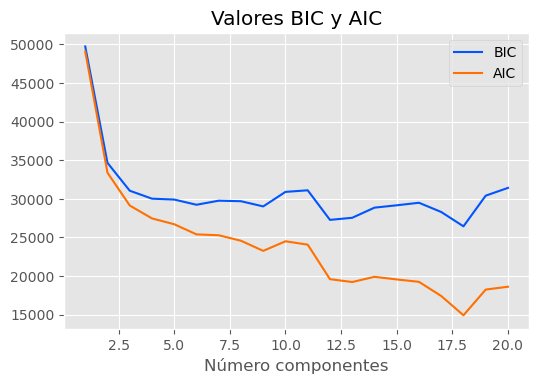

In [ ]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(datos_scaled)
    valores_bic.append(modelo.bic(datos_scaled))
    valores_aic.append(modelo.aic(datos_scaled))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [ ]:
print(f"Número óptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"Número óptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")

Número óptimo acorde al BIC: 18
Número óptimo acorde al AIC: 18


In [ ]:

# Evaluar la calidad del clustering
silhouette_score = metrics.silhouette_score(data_scaled_copy, data_scaled_copy['GmmLabels'])
calinski_harabasz_score = metrics.calinski_harabasz_score(data_scaled_copy, data_scaled_copy['GmmLabels'])
davies_bouldin_score = metrics.davies_bouldin_score(data_scaled_copy, data_scaled_copy['GmmLabels'])

print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")


Silhouette Score: 0.18996478636517383
Calinski-Harabasz Score: 534.6993851557595
Davies-Bouldin Score: 1.7585260583490836


Resumen y recomendaciones:
- Silhouette Score (0.189): Indica que los clusters están ligeramente mejor definidos que antes, pero aún hay superposición.
- Calinski-Harabasz Score (534.70): Sugiere una mejora en la separación entre los clusters, pero todavía no es excelente.
- Davies-Bouldin Score (1.758): Indica una ligera mejora en la superposición entre los clusters, pero aún no es ideal.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Si datos_scaled es un DataFrame con las columnas deseadas:
X = datos_scaled.values

# Estimar el ancho de banda para Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Instanciar y ajustar el modelo Mean Shift
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

# Obtener las etiquetas de los clusters
labels = ms.labels_

# Agregar las etiquetas al DataFrame df1
df1['MeanShiftLabels'] = labels


In [ ]:
df1.MeanShiftLabels.value_counts()

MeanShiftLabels
0     1145
1       49
21      32
51      28
2       22
      ... 
46       1
48       1
25       1
57       1
28       1
Name: count, Length: 62, dtype: int64

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics


# Supongamos que 'datos_scaled' es tu DataFrame de datos escalados

# Estimar el ancho de banda para Mean Shift
data_scaled_copy=datos_scaled.copy()
bandwidth = estimate_bandwidth(data_scaled_copy, quantile=0.2, n_samples=500)

# Instanciar y ajustar el modelo Mean Shift
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data_scaled_copy)

# Obtener las etiquetas de los clusters
MeanShiftLabels = ms.labels_

# Evaluar la calidad del clustering
silhouette_score = metrics.silhouette_score(data_scaled_copy, MeanShiftLabels)
calinski_harabasz_score = metrics.calinski_harabasz_score(data_scaled_copy, MeanShiftLabels)
davies_bouldin_score = metrics.davies_bouldin_score(data_scaled_copy, MeanShiftLabels)

# Imprimir los resultados
print(f"Silhouette Score: {silhouette_score}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")
print(f"Davies-Bouldin Score: {davies_bouldin_score}")


Silhouette Score: 0.253712631460686
Calinski-Harabasz Score: 27.38975854885102
Davies-Bouldin Score: 1.3359924760920543


Resumen y recomendaciones:
- Silhouette Score (0.254): Indica una mejora en la definición de los clusters, pero aún no es óptimo.
- Calinski-Harabasz Score (27.39): Este valor es significativamente más bajo que los anteriores, lo que sugiere una menor separación clara entre los clusters.
- Davies-Bouldin Score (1.336): Indica una mejora en la superposición de clusters, con clusters más claramente definidos.

## Insights accionables para el minorista

El minorista puede ofrecer recomendaciones personalizadas y ofertas a un segmento particular de clientes y brindar una mejor experiencia.

La segmentación puede ayudar a los minoristas a comprender mejor los grupos de clientes que compran en la tienda. Esta perspectiva puede ayudar a desarrollar promociones de marketing dirigidas a segmentos específicos de clientes. Los minoristas pueden aprovechar la información demográfica y el comportamiento de compra para lograr una alta tasa de conversión en las promociones, en comparación con el enfoque actualmente ineficaz. Los datos también permiten monitorear mejor la efectividad de las campañas promocionales y permiten a los equipos de marketing evaluar el desempeño de las promociones dentro de sus grupos objetivo.

El minorista también puede mejorar su proceso de recopilación de datos para obtener información más relevante y crear modelos de comportamiento del cliente más efectivos. Debería revisar continuamente los modelos seleccionados para tener en cuenta los cambios en el comportamiento del cliente (por ejemplo, dietas, estacionalidad, tendencias de la industria, tendencias económicas) y los datos adicionales que puedan estar disponibles.

Al observar los ingresos, encontramos que más del 99 por ciento de los clientes ganan menos de 100,000, con la mayoría ganando entre 35,000 y 68,000 (según las estadísticas resumidas de ingresos). Por lo tanto, podemos inferir razonablemente que los datos se recopilaron de minoristas de nivel bajo a medio, en lugar de minoristas de precios más altos.

En cuanto a la educación, la visualización revela que la mayoría de los clientes tienen al menos un título universitario, lo cual concuerda con el gráfico del año de nacimiento que muestra que la mayoría de los clientes tienen más de 30 años, mientras que el gráfico del estado civil muestra que una clara mayoría de compradores son parejas o familias (por ejemplo, Juntos, Casados), en lugar de individuos solteros. Esta perspectiva puede informar las decisiones de compra y el tipo de experiencia de compra que prefieren estos clientes.

Considerando que los clientes sin alguna relación sentimental suelen ser más jóvenes que los clientes divorciados; por lo tanto, tienden a tener un monto de ingresos más bajo. Por otro lado, observamos que los clientes que están en pareja o divorciados tienden a realizar compras a través de canales en tienda y catálogo. Para apuntar a este conjunto de clientes, el minorista puede utilizar promociones en tienda para los productos específicos que estos consumidores tienden a preferir.

Utilizando los datos de las columnas "Kidhome" y "Teenhome", podemos determinar un número total de hijos. La columna "NumWebPurchases" muestra que el número de hijos aumenta consistentemente con la cantidad promedio de visitas web. Por tanto, deberíamos esperar que la columna "NumStorePurchases" exhiba la tendencia opuesta, lo cual sucede. Intuitivamente, esto es coherente con las expectativas. Los clientes con hijos tienden a tener menos tiempo para ir a la tienda y prefieren la conveniencia de las compras en línea para ahorrar tiempo. También esperaríamos que la columna "NumDealsPurchases" muestre una tendencia creciente debido a que las familias más numerosas tienen mayores costos de compras de abarrotes y tienden a elegir más descuentos para sus compras.

Por ejemplo, el minorista puede dirigirse a clientes con dos o tres hijos con promociones específicas para los productos que compran. El minorista puede llevar esto un paso más allá al proporcionar a los clientes promociones a través de métodos en línea (por ejemplo, correo electrónico, redes sociales) y al hacer que la compra web sea más fácil para reducir el nivel de abandono y aumentar el número de compras. De manera similar, para clientes de ingresos más bajos, el minorista puede ofrecer una mejor selección de productos o promover los productos más populares en ese grupo para aumentar las visitas y compras en la tienda.